In [2]:
# High Energy Detector Lab
# Need to take data from detectors, import data, remove background, plot counts vs channels
# Fit gaussians to the peaks, find channel for each peak, plot peak energies (from knowing the spectra) vs their peaks
# Associate each channel with an energy and then plot that bitch

# Watch out for pair production and compton scattering plateau

In [3]:
# %%capture
# !pip install ipympl
# from google.colab import output
# get_ipython().kernel.do_shutdown(restart=True)

In [4]:
%matplotlib ipympl

In [5]:
# Getting Data

# First, Creating a Dictionary for the header
data_head = {}

# Creating a location for the data
data = []

# Open the file
with open('BGO_Co_60_direct.Spe') as file:

    # Ok loops are how I understand things so I'm making a index to loop through the lines
    lines = file.readlines()
    ind = list(range(0,len(lines),1))

    # Read each line in the file
    for val in ind:
        line = lines[val].strip()

        # Get header
        if line.startswith('$'): #These are the titles of our header

            # Read the line and remove # (This become Dictionary Header)
              line = line.replace("$", "").strip()

            # Read next line to get the Dictionary Value (cuts off stupid 'Comments' sadly)
              value = lines[val+1].strip()

            # Add Header to the dictionary
              data_head.update({line: value})

        # Get data
        else:
            # Just looking for data here, don't care about other stuff
            try:
                counts = list(map(float, line.split(',')))
                data.append(counts)

            except ValueError:
                # This is when we read a line that doesn't have # but is a str of letters
                # And we DONT WANT IT
                pass


In [6]:
len(data)
# Crap there's shit at the end of the data that's messing with this shit

1029

In [7]:
data[1027]

[3.0]

In [8]:
data_head
# Doesn't catch all the shit at the end cause it's formatted different FUCK

{'SPEC_ID:': 'No sample description was entered.',
 'SPEC_REM:': 'DET# 2',
 'DATE_MEA:': '10/21/2025 12:12:15',
 'MEAS_TIM:': '591 591',
 'DATA:': '0 1023',
 'ROI:': '0',
 'PRESETS:': 'None',
 'ENER_FIT:': '0.000000 2.205567',
 'MCA_CAL:': '3',
 'SHAPE_CAL:': '3'}

In [9]:
# Going to concatenate my data and just not going to care about the header info
# at the end (MCA_CAL and SHAPE_CAL)

# Find where to cut-off data
z , cutoff = data_head['DATA:'].split(' ')
cutoff = int(cutoff)

# Cut that data doooowwwn
data = data[:1023+1]

In [10]:
# Going to make this a function cause I'm going to have to use it alot
def Spe_parser(filename):
  # Getting Data

  # First, Creating a Dictionary for the header
  data_head = {}

  # Creating a location for the data
  data = []

  # Open the file
  with open(filename) as file:

    # Ok loops are how I understand things so I'm making a index to loop through the lines
    lines = file.readlines()
    ind = list(range(0,len(lines),1))

    # Read each line in the file
    for val in ind:
        line = lines[val].strip()

        # Get header
        if line.startswith('$'): #These are the titles of our header

            # Read the line and remove # (This become Dictionary Header)
              line = line.replace("$", "").strip()

            # Read next line to get the Dictionary Value (cuts off stupid 'Comments' sadly)
              value = lines[val+1].strip()

            # Add Header to the dictionary
              data_head.update({line: value})

        # Get data
        else:
            # Just looking for data here, don't care about other stuff
            try:
                counts = list(map(float, line.split(',')))
                data.append(counts)

            except ValueError:
                # This is when we read a line that doesn't have # but is a str of letters
                # And we DONT WANT IT
                pass
  # Going to concatenate my data and just not going to care about the header info
  # at the end (MCA_CAL and SHAPE_CAL)

  # Find where to cut-off data
  z , cutoff = data_head['DATA:'].split(' ')
  cutoff = int(cutoff)

  # Cut that data doooowwwn
  data = data[:1023+1]

  ## NORMALIZE TO COUNTS/SEC

  # Find how many seconds we had
  secs , deadsecs  = data_head['MEAS_TIM:'].split(' ')

  # Divide the data!!!!!!!!!!!
  data = np.array(data)/int(secs)

  return data, data_head


In [11]:
# Let's import our plotting libraries
import sys
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 1.0, 'Cobalt 60')

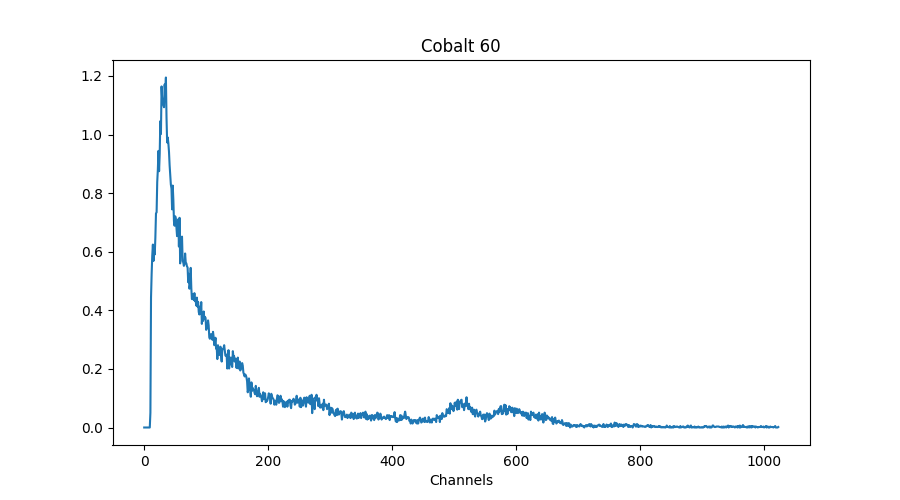

In [12]:
# Make sure I save Cobalt data properly
Co_data, Co_data_head = Spe_parser('BGO_Co_60_direct.Spe')

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Co_data)
plt.xlabel('Channels')
plt.title('Cobalt 60')

In [13]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [14]:
from google.colab import output
output.disable_custom_widget_manager()

Text(0.5, 1.0, 'Cobalt 60 MINUS Background')

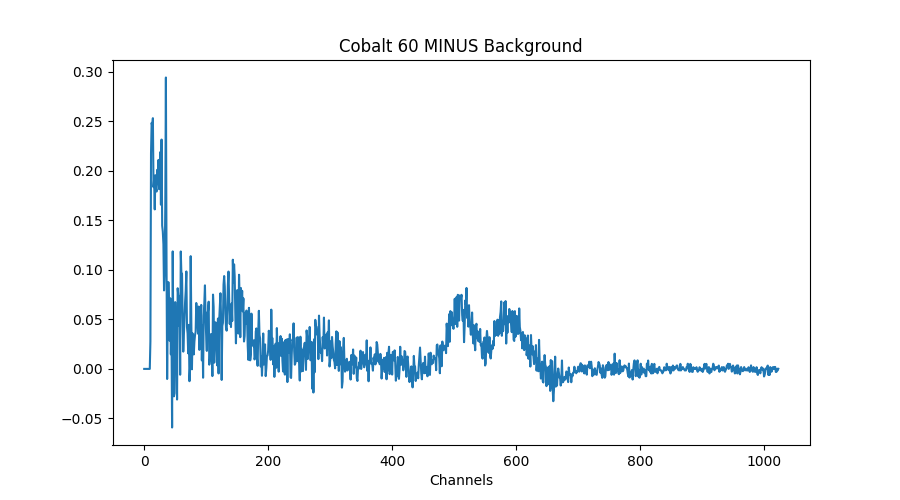

In [15]:
# Now let's try and remove the background

# Import Background data
bck_data, bck_data_head = Spe_parser('BGO_Bck_New.Spe')

# Subtract ????????
Co_data_adj = np.array(Co_data) - np.array(bck_data)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Co_data_adj)
plt.xlabel('Channels')
plt.title('Cobalt 60 MINUS Background')


Text(0.5, 1.0, 'Background')

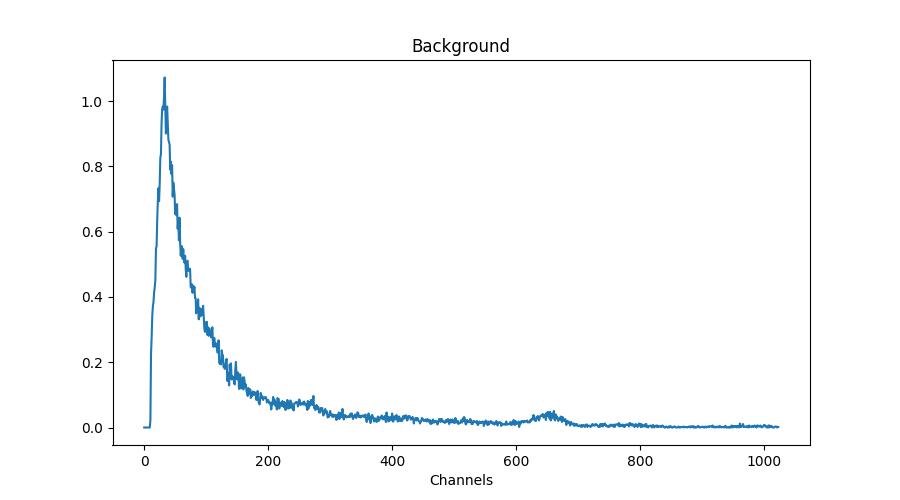

In [16]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(bck_data)
plt.xlabel('Channels')
plt.title('Background')

In [17]:
bck_data_head['MEAS_TIM:']

'652 652'

In [18]:
Co_data_head['MEAS_TIM:']

'591 591'

In [19]:
# Trying with another spectra cause Cobalt is confusing & STUPID

Text(0.5, 1.0, 'Americium')

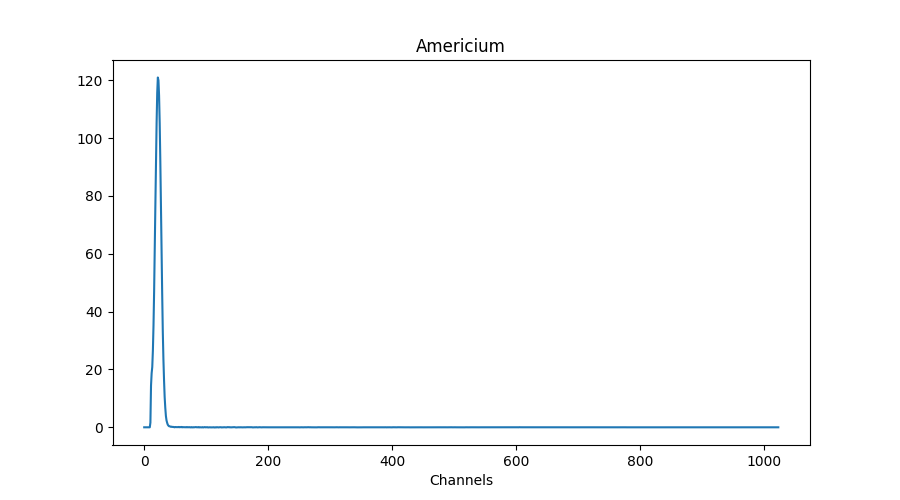

In [20]:
# Americium
Am_data, Am_data_head = Spe_parser('BGO_Am_241_direct.Spe')

# Remove the background
Am_data_adj = (Am_data - bck_data).flatten() # Flattening to make it easier to math with

# Plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Am_data_adj)
plt.xlabel('Channels')
plt.title('Americium')

In [21]:
Am_data[1023]

# curvefit can take bounds and would give peak from guess p0
# lnfit

array([0.])

In [22]:
# ## SKIP THIS WAS ALL STUPID CURVEFIT AND NOW I HAVE GREAT LMFIT

# # Fit a stupid gaussian to it

# # Seriously just using the stuff from Curvefit_notes.ipynb
# def gaussian(x, mu, sigma, amp):
#     return amp * np.exp(-0.5 * (x-mu)**2 / sigma**2) #/ np.sqrt(2 * np.pi * sigma**2)

# # Get Gaussian values with Moments
# def first_moment(x, y):
#     return np.sum(x * y) / np.sum(y)

# def second_moment(x, y):
#     x0 = first_moment(x, y)
#     return np.sum((x - x0)**2 * y) / np.sum(y)

# def gaussian_initial_estimates(x, y):
#     mu0 = first_moment(x, y)
#     sig0 = second_moment(x, y)
#     amp0 = y.max()
#     return [mu0, sig0, amp0]

# p0 = [1 , 1, max(Am_data_adj)]

# #Well fuck I gotta create an x range since data is just
# x_range = np.arange(0,1024)

# mu0, sig0, amp0 = gaussian_initial_estimates(x_range, Am_data_adj)


# # Now get those fancy popt and pcov guys
# from scipy.optimize import curve_fit

# import numpy as np

# new_data = Am_data_adj.flatten()

# p0 = [mu0, sig0, amp0]
# popt_trf, pcov_trf = curve_fit(gaussian, x_range, new_data, method = 'trf', p0 = p0)

# popt, pcov = curve_fit(gaussian, x_range, new_data, p0 = p0)

# popt1, pcov1 = curve_fit(gauss, x_range, new_data, p0 = p0)


In [23]:
# fig, ax = plt.subplots(figsize=(9,9))
# #ax.plot(new_data, label = 'data')
# ax.plot(x_range, gaussian(x_range, *p0), label = 'popt normal')
# ax.plot(x_range, gaussian(x_range, *popt_trf), label = 'popt trf')
# plt.legend()

In [24]:
pract = [1, 2, 3, 5, 678, 8, 9]
length_1 = len(pract)
#print(pract[0:7])
pract.index(3)

2

In [25]:
%%capture
!pip install lmfit

In [26]:
# Using lm Model.guess to find best intial parameters
#params = gmodel.guess( Am_data_adj, x_range)
# sorry pal .guess is not available for Gaussian

x_range = np.arange(0,1024)

# Using lm Model.guess with Gaussian Model to find init params
from lmfit.models import GaussianModel
model = GaussianModel()
params = model.guess(Am_data_adj, x_range)
#amp0 = np.arry(params)[0]
#cen0 = np.arry(params)[1]
#wid0 = np.arry(params)[3]


In [27]:
#gmodel.fit?

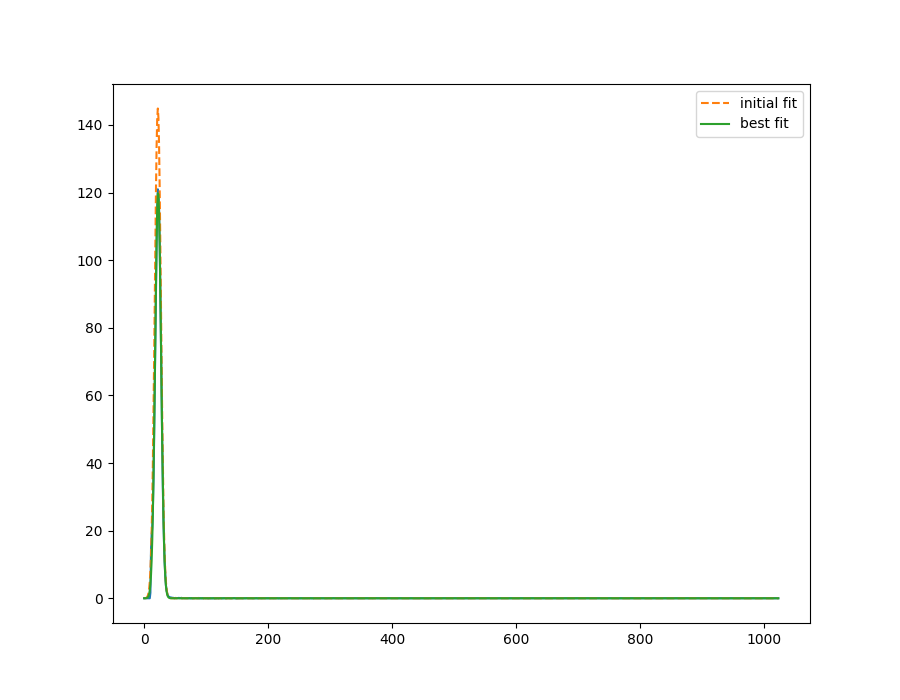

In [28]:

from lmfit import Model

def gauss(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)
gmodel = Model(gauss)

result = model.fit(Am_data_adj,x =x_range, params = params)
#result = gmodel.fit(Am_data_adj, x= x_range, cen = cen0, amp = amp0, wid = wid0)
# cen = 4 , amp = 10 width =21
# cen = 5 , amp = 15, wid = 21


#Create an x range since data is just index & counts
x_range = np.arange(0,1024)

fig, ax = plt.subplots(figsize = (9,7), label = 'my data')
plt.plot(x_range, Am_data_adj)
plt.plot(x_range, result.init_fit, '--', label='initial fit')
plt.plot(x_range, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()


In [29]:
params.values()


dict_values([<Parameter 'amplitude', value=1815.478423940203, bounds=[-inf:inf]>, <Parameter 'center', value=22.0, bounds=[-inf:inf]>, <Parameter 'sigma', value=5.0, bounds=[0.0:inf]>, <Parameter 'fwhm', value=11.7741, bounds=[-inf:inf], expr='2.3548200*sigma'>, <Parameter 'height', value=144.85422760941591, bounds=[-inf:inf], expr='0.3989423*amplitude/max(1e-15, sigma)'>])

In [30]:
p = np.array(params)
p

array([1815.47842394,   22.        ,    5.        ,   11.7741    ,
        144.85422761])

In [31]:
params

Parameters([('amplitude', <Parameter 'amplitude', value=1815.478423940203, bounds=[-inf:inf]>), ('center', <Parameter 'center', value=22.0, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=5.0, bounds=[0.0:inf]>), ('fwhm', <Parameter 'fwhm', value=11.7741, bounds=[-inf:inf], expr='2.3548200*sigma'>), ('height', <Parameter 'height', value=144.85422760941591, bounds=[-inf:inf], expr='0.3989423*amplitude/max(1e-15, sigma)'>)])

In [32]:
# CURVE FIT YOU ARE DEAD TO ME! YOU HEAR ME? YOU CAN DIE

In [33]:
# Now I have a fitted Gaussian I want to find the peak x-coordinate
result

In [34]:
result.params

Parameters([('amplitude', <Parameter 'amplitude', value=1444.1589014112803 +/- 2.01, bounds=[-inf:inf]>), ('center', <Parameter 'center', value=22.43171163850464 +/- 0.00772, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=4.791268239738161 +/- 0.00772, bounds=[0.0:inf]>), ('fwhm', <Parameter 'fwhm', value=11.282574276300219 +/- 0.0182, bounds=[-inf:inf], expr='2.3548200*sigma'>), ('height', <Parameter 'height', value=120.24709218241865 +/- 0.168, bounds=[-inf:inf], expr='0.3989423*amplitude/max(1e-15, sigma)'>)])

In [35]:
result.params['center'].value

22.43171163850464

In [36]:
result.params['center'].stderr

0.007716106142278444

In [37]:
# Now we have found the channel number for the peak and we want to save it to a table
peak_chan = []
peak_eng = []
peak_chan.append(result.params['center'].value)
peak_eng.append(59.5) #keV

In [38]:
# Now I gotta figure out how to find a peak on multiple peaks

# Can find a peak
# Can find the data range around the peak
# Can Model.set_param_hint(name, **kwargs)

In [39]:
import os
import sys
from scipy.signal import find_peaks

Text(0.5, 1.0, 'Barium')

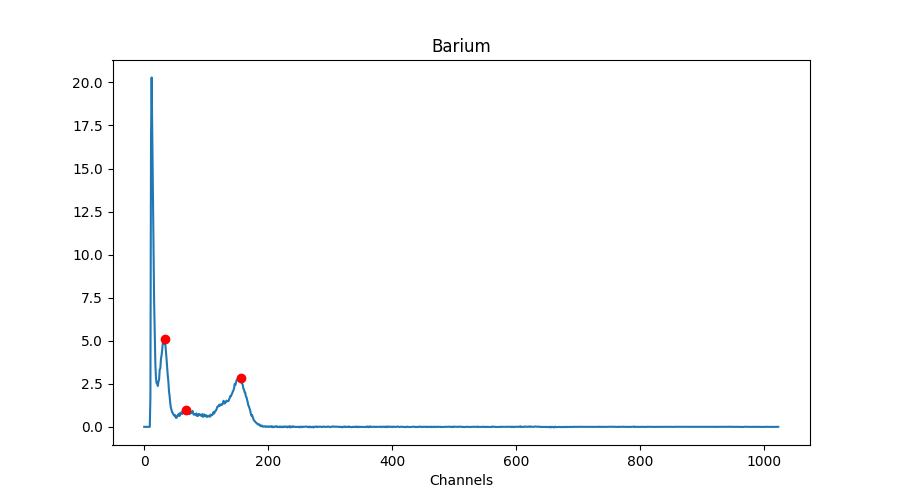

In [40]:
# Trying with multiple peaks

# Barium
Ba_data, Ba_data_head = Spe_parser('BGO_Ba_direct.Spe')

# Remove the background
Ba_data_adj = (Ba_data - bck_data).flatten() # Flattening to make it easier to math with

# See how find_peaks works
peaks, _ = find_peaks(Ba_data_adj, height = 0.5, width = 5)

# Plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Ba_data_adj)
ax.plot(x_range[peaks], Ba_data_adj[peaks], 'ro')
plt.xlabel('Channels')
plt.title('Barium')


In [41]:
peaks

array([ 33,  67, 156])

In [42]:
x_range[peaks]

array([ 33,  67, 156])

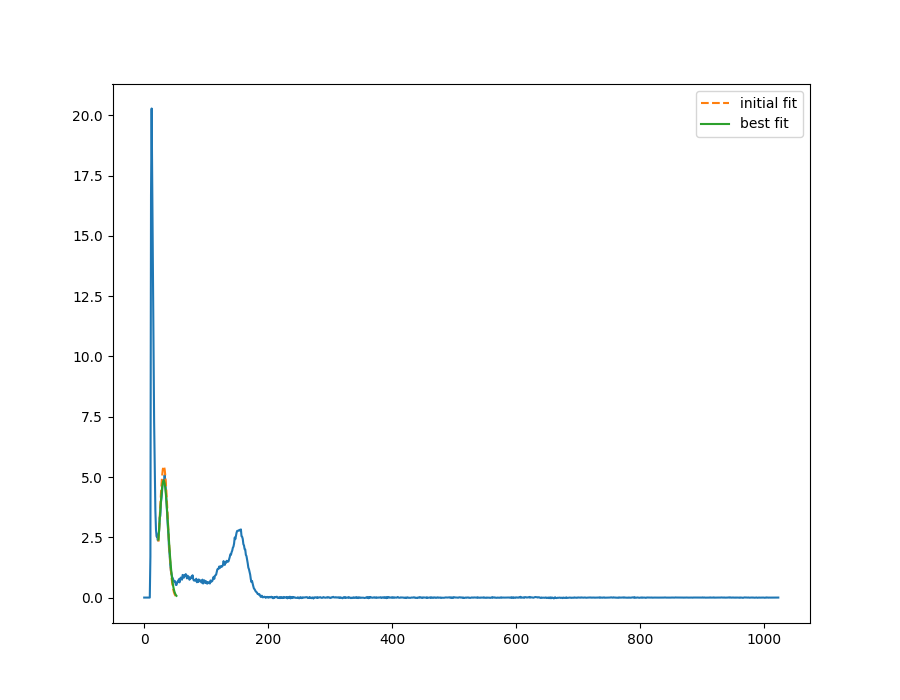

In [43]:
# Now we know we have these peaks, how do I focus the gaussian fit only on that peak?
# initial centroid

from lmfit.models import GaussianModel
model = GaussianModel()
params = model.guess(Ba_data_adj[peaks[0]-10:peaks[0]+20], x_range[peaks[0]-10:peaks[0]+20])



#amp0 = np.arry(params)[0]
#cen0 = np.arry(params)[1]
#wid0 = np.arry(params)[3]

result_Ba = model.fit(Ba_data_adj[peaks[0]-10:peaks[0]+20], x = x_range[peaks[0]-10:peaks[0]+20], params = params)

fig, ax = plt.subplots(figsize = (9,7))
plt.plot(x_range, Ba_data_adj)
plt.plot(x_range[peaks[0]-10:peaks[0]+20], result_Ba.init_fit, '--', label='initial fit')
plt.plot(x_range[peaks[0]-10:peaks[0]+20], result_Ba.best_fit, '-', label='best fit')
plt.legend()
plt.show()

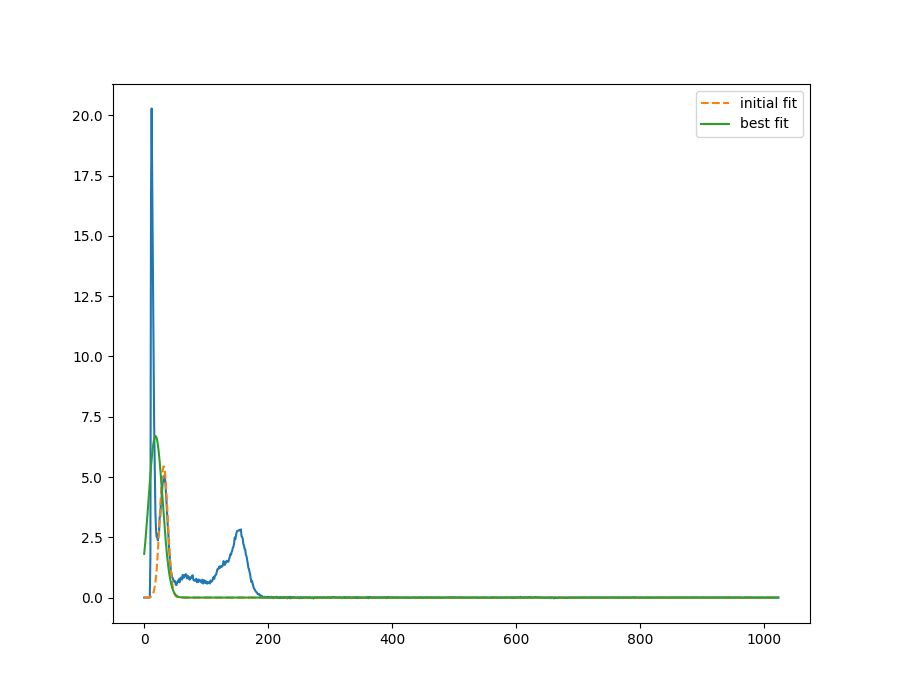

In [44]:


# I've constrained the initial parameters but using all the data for the fit,
# shifts the fit towards the stupid high peak
Ba_1result = model.fit(Ba_data_adj, x = x_range, params = params)
fig, ax = plt.subplots(figsize = (9,7), label = 'my data')
plt.plot(x_range, Ba_data_adj)
plt.plot(x_range, Ba_1result.init_fit, '--', label='initial fit')
plt.plot(x_range, Ba_1result.best_fit, '-', label='best fit')
plt.legend()
plt.show()

In [45]:
Ba_1result

In [46]:
result_Ba

In [47]:
# Make it a function

def peak_gauss(xdata, ydata, lr, hr, plot_title):

  # Find peaks of data
  peaks, _ = find_peaks(ydata, height = 1, width = 5)

  # Loop through peaks and fit gaussian
  from lmfit.models import GaussianModel
  model = GaussianModel()

  fig, ax = plt.subplots(figsize = (9,7))
  plt.plot(xdata, ydata)
  plt.title(plot_title)

  # Save results
  peakgauss_result = []
  centroid_result = []

  # Peak counter cause I hate np.where
  peaknum = 1
  index = np.arange(0,len(peaks))

  for val in peaks:

    chan_range = np.arange((val - lr), (val + hr))
        #(val - 10), (val + 20))


    params = model.guess(ydata[chan_range], xdata[chan_range])

    result = model.fit(ydata[chan_range], x = xdata[chan_range], params = params)

    # Add result to results array
    peakgauss_result.append(result)
    centroid_result.append(result.params['center'].value)

    # Plot
    plt.plot(xdata[chan_range], result.init_fit, '--', label=f'initial fit peak {peaknum}')
    plt.plot(xdata[chan_range], result.best_fit, '-', label=f'best fit peak {peaknum}')
    plt.xlabel('Channel')
    plt.ylabel('Counts per Second')
    plt.legend()

    # Add nice labels
    plt.text((val+10), (ydata[val] + 1), f'Peak {peaknum}', color = 'red')

    peaknum += 1

  return peakgauss_result, centroid_result

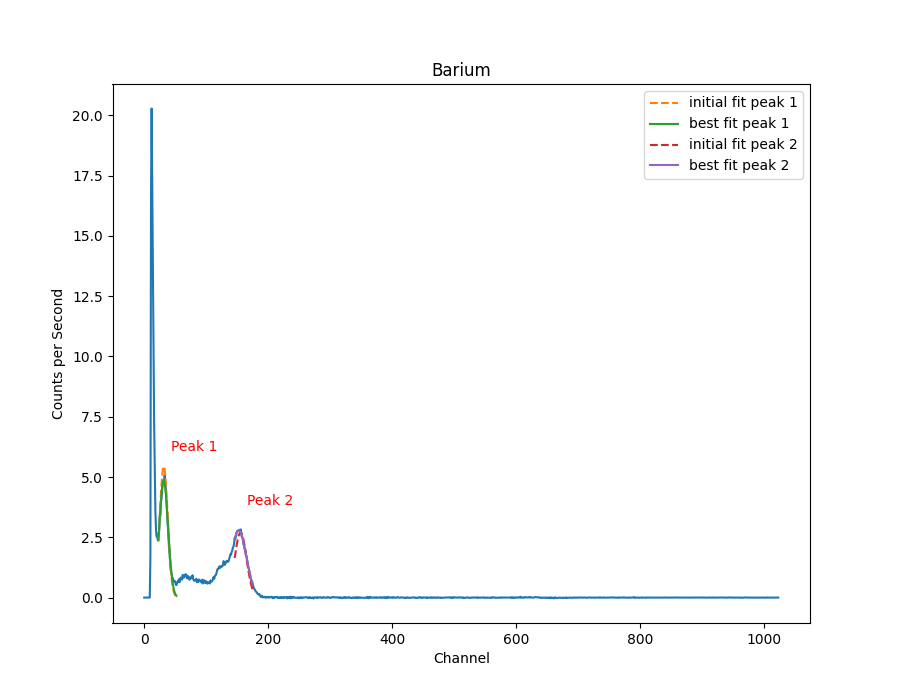

In [48]:
#peaks, _ = find_peaks(Ba_data_adj, height = 1, width = 5)
result_array, Bacentroid_result = peak_gauss(x_range, Ba_data_adj, 10, 20, 'Barium')

In [49]:
# Now I have to manually assign energies to those peaks
Ba_energies = [30.81, 81.07] # keV for those peaks at 31 and 152
Ba_channels = Bacentroid_result

In [50]:
# Trying it for Cesium
# Cesium
Cs_data, Cs_data_head = Spe_parser('BGO_Cs137_direct.Spe')

# Remove the background
Cs_data_adj = (Cs_data - bck_data).flatten() # Flattening to make it easier to math with

# Didn't need anymore, figured out issue
# Choose peaks
#Cs_peaks, _ = find_peaks(Cs_data_adj, height = 1, width = 10)

# Plot
#fig, ax = plt.subplots(figsize=(9,5))
#ax.plot(Cs_data_adj)
#ax.plot(x_range[Cs_peaks], Cs_data_adj[Cs_peaks], 'ro')
#plt.xlabel('Channels')
#plt.title('Cesium')



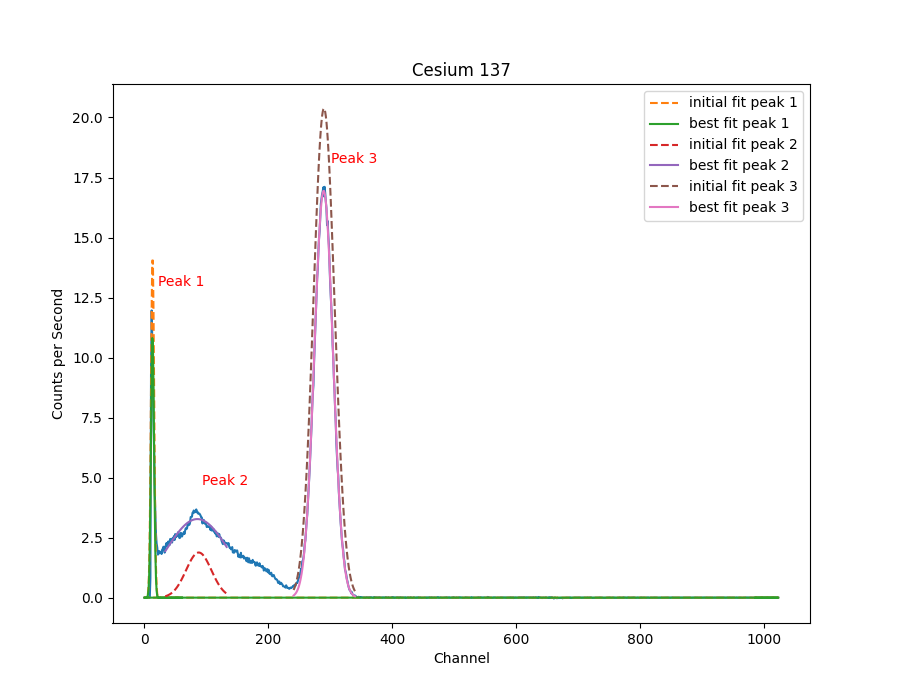

In [51]:

# Find my peaks and gaussian fits
Cs_results, Cs_centroids = peak_gauss(x_range, Cs_data_adj, 50, 50, 'Cesium 137')


In [52]:
# Lookijng at the graph
# We don't want peak 1
# Peak 2 is 31.39 keV
# Peak 3 is 661.31 keV
Cs_energies = [31.39 , 661.31]
Cs_channels = Cs_centroids[1:]

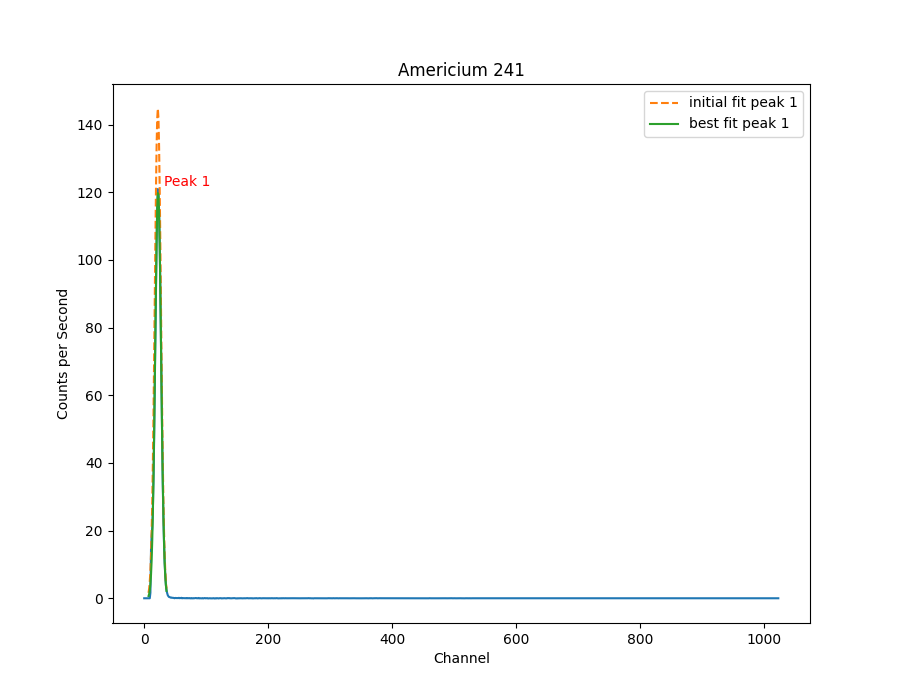

In [53]:
# Trying with Amercium

#Load Data
Am_data, Am_data_head = Spe_parser('BGO_Am_241_direct.Spe')

# Remove the background
Am_data_adj = (Am_data - bck_data).flatten()

# Find Gaussian
Am_results, Am_centroids = peak_gauss(x_range, Am_data_adj, 15, 15, 'Americium 241')


In [54]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [55]:
from google.colab import output
output.disable_custom_widget_manager()

In [56]:
Am_energies = [59.5]
Am_channels = Am_centroids

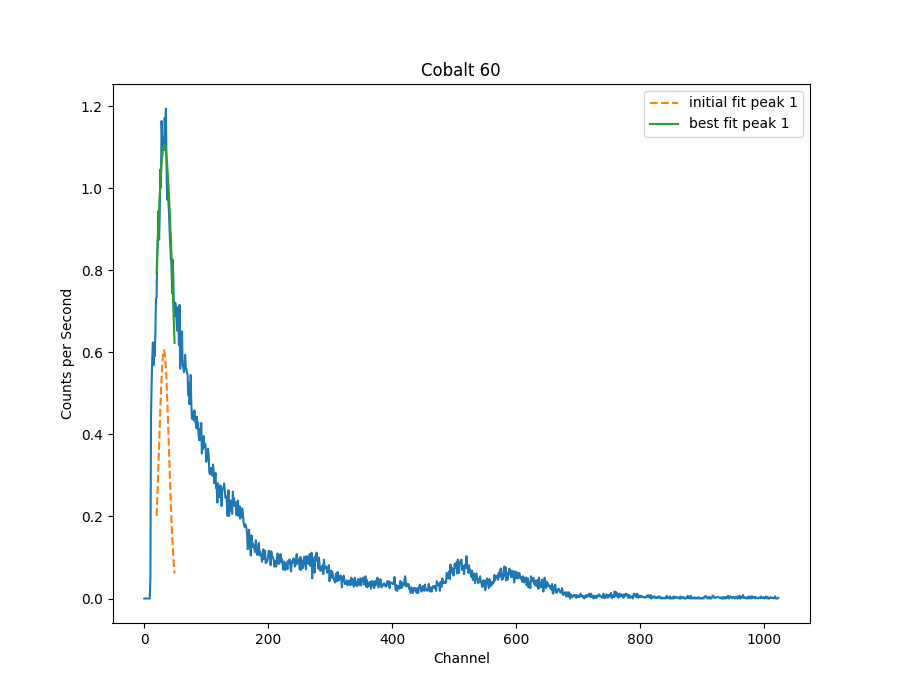

In [57]:
# Cobalt (that bitch)

#Load Data
Co_data, Co_data_head = Spe_parser('BGO_Co_60_direct.Spe')

# Remove the background
Co_data_adj = (Co_data - bck_data).flatten()

# Find Gaussian
Co_results, Co_centroids = peak_gauss(x_range, Co_data.flatten(), 15, 15, 'Cobalt 60')

## Note: If I forget removing the background, the data is so gross it still doesn't
#        register anything but the initial peak



In [58]:
# Now I have everybody's channels and energies, time to make the plot

BGO_channels = Ba_channels + Cs_channels + Am_channels
BGO_energies = Ba_energies + Cs_energies + Am_energies

In [59]:
BGO_channels

[31.423503396344092,
 152.52122988816566,
 85.73684937834679,
 289.5450791646279,
 22.431486875265314]

In [60]:
BGO_energies

[30.81, 81.07, 31.39, 661.31, 59.5]

Text(0, 0.5, 'BGO Energy')

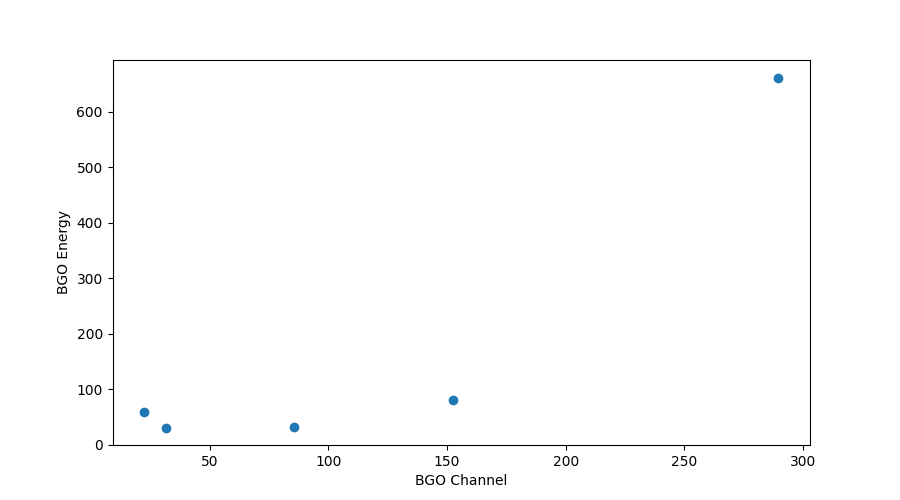

In [61]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(BGO_channels, BGO_energies)
plt.xlabel('BGO Channel')
plt.ylabel('BGO Energy')

In [62]:
# wat
# seriously how is this a linear relationship this is breaking my brain

In [63]:
# Lmao lets see if we can get a linear fit
from lmfit.models import LinearModel
Lmodel = LinearModel()
params = Lmodel.guess(BGO_energies, BGO_channels)

result_linear = Lmodel.fit(BGO_energies, x = BGO_channels, params = params)

In [64]:
result_linear

Text(0, 0.5, 'BGO Energy')

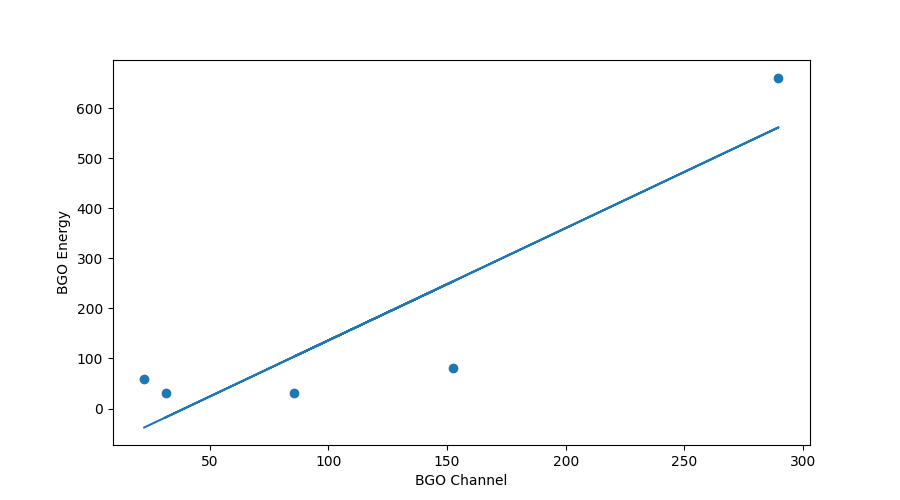

In [65]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(BGO_channels, BGO_energies)
plt.plot(BGO_channels, result_linear.best_fit)
plt.xlabel('BGO Channel')
plt.ylabel('BGO Energy')

In [66]:
# that is so ass

In [67]:
## Absolute Efficiency
# e absolute = count rate / source activity

# Source Activity Dec 1st 1979 (from box info)
Am241_SA = 11.16 #microCurie
Ba133_SA = 11.42
Cs137_SA = 11.16
Co60_SA = 12.28

# Source Half-Life (from Student Handbook)
Am241_HL = 432.2
Ba133_HL = 10.537
Cs137_HL = 30.09
Co60_HL = 5.2714

# Years since December 1st 1979 till Oct 21st (BGO) Oct 28th (NaI) and Nov 4 (CdTe)
from datetime import datetime

# Google Gemini generated code I turned into a function
# (was going to just google: how long since __ but this is nicer)
def how_long_yrs(date0, date1):
  from datetime import datetime

  # Calculate the difference
  difference = date1 - date0

  # Extract the years
  years = difference.days / 365

  return years

date_start = datetime(1979, 12, 1)
date_BGO = datetime(2025, 10, 21)
date_NaI = datetime(2025, 10, 28)
date_CdTe = datetime(2025, 11, 4)

years_BGO = how_long_yrs(date_start, date_BGO)
years_NaI = how_long_yrs(date_start, date_NaI)
years_CdTe = how_long_yrs(date_start, date_CdTe)

# Create function that calculates current activity
def activity_now(init_activity, half_life, time):
  import numpy as np

  current_activity = init_activity*np.exp(-(np.log(2)*time)/half_life)

  return current_activity

# Find current activity (Right now this is for BGO) (still in microCurie)
Am241_CA = activity_now(Am241_SA, Am241_HL, years_BGO)
Ba133_CA = activity_now(Ba133_SA, Ba133_HL, years_BGO)
Cs137_CA = activity_now(Cs137_SA, Cs137_HL, years_BGO)
Co60_CA = activity_now(Co60_SA, Co60_HL, years_BGO)

# Find count rate (Count rate or total counts? Right now data is cps not count)
Am241_counts = sum(Am_data_adj)
Ba133_counts = sum(Ba_data_adj)
Cs137_counts = sum(Cs_data_adj)
Co60_counts = sum(Co_data_adj)
# Convert microCurie to cps: 1 microcurie = 37000 cps

# Find absolute efficiency (in percent)
Am241_BGO_abse = (Am241_counts / (Am241_CA*37000))*100
Ba133_BGO_abse = (Ba133_counts / (Ba133_CA*37000))*100
Cs137_BGO_abse = (Cs137_counts / (Cs137_CA*37000))*100
Co60_BGO_abse = (Co60_counts / (Co60_CA*37000))*100


In [68]:
Am241_CA

np.float64(10.36764806773385)

In [69]:
print(Am241_BGO_abse, Ba133_BGO_abse, Cs137_BGO_abse, Co60_BGO_abse)

0.37855253297937996 1.6480669933591905 0.8013222831250687 1.8674284634786291


In [70]:
## Intrinsic Efficiency
# count rate / flux at distance * surface area

# Detector Diameter (from Datasheets)
BGO_r = 2*2.54 # cm circular
NaI_r = 2*2.54 # cm circular BUT NOT FROM CORRECT BIT OF DATASHEET
CdTe_r = 3/10 # cm square

# Detector Surface Area (cm**2)
BGO_area = np.pi*(BGO_r**2)
NaI_area = np.pi*(NaI_r**2)
CdTe_area = CdTe_r**2

# Source Distance to Detector (from Eris's measurements)
BGO_d = 15 #cm
NaI_d = 16 #cm
CdTe_d = 10 #cm

# Geometric Factor
AM241_BGO_G0 = BGO_area / (4*np.pi*BGO_d**2)

# EMission Fraction
Am241_BGO_EF = 0.3578

# Intrinsic

Am241_BGO_ie = Am_results[0].params['amplitude'].value / (Am241_CA*37000*AM241_BGO_G0 * Am241_BGO_EF)

# # Photon Flux at Detector
# Am241_BGO_f = Am241_CA*37000/(4*np.pi*BGO_d**2)
# Ba133_BGO_f = Ba133_CA/(4*np.pi*BGO_d**2)
# Cs137_BGO_f = Cs137_CA/(4*np.pi*BGO_d**2)
# Co60_BGO_f = Co60_CA/(4*np.pi*BGO_d**2)

# Calculate Intrinsic Efficiency
# Am241_BGO_intre = (Am241_counts / (Am241_BGO_f*0.3578*BGO_area))*100
# Am241_BGO_intre2 = (Am_results[0].params['amplitude'].value / (Am241_BGO_f*0.3578*BGO_area))*100



In [71]:
Am241_BGO_EF

0.3578

In [72]:
source_results = Am_results[0]

In [73]:
def find_efficiencies(detector, source, source_results):
  """
    detector: "BGO", "NaI", or "CdTe"
    source: "AM", "BA", "CS","CO"
  """

  ## Defining Source Activity and Detector Features
  # Source Activity Dec 1st 1979 (from box info)
  Am241_SA = 11.16 #microCurie
  Ba133_SA = 11.42
  Cs137_SA = 11.16
  Co60_SA = 12.28

  # Source Half-Life (from Student Handbook)
  Am241_HL = 432.2
  Ba133_HL = 10.537
  Cs137_HL = 30.09
  Co60_HL = 5.2714

  # Detector Diameter (from Datasheets)
  BGO_r = 2*2.54 # cm circular
  NaI_r = 2*2.54 # cm circular BUT NOT FROM CORRECT BIT OF DATASHEET
  CdTe_r = 3/10 # cm square

  # Detector Surface Area (cm**2)
  BGO_area = np.pi*(BGO_r**2)
  NaI_area = np.pi*(NaI_r**2)
  CdTe_area = CdTe_r**2

  # Source Distance to Detector (from Eris's measurements)
  BGO_d = 15 #cm
  NaI_d = 16 #cm
  CdTe_d = 10 #cm

  # Years since December 1st 1979 till Oct 21st (BGO) Oct 28th (NaI) and Nov 4 (CdTe)
  from datetime import datetime

  # Google Gemini generated code I turned into a function
  # (was going to just google: how long since __ but this is nicer)
  def how_long_yrs(date0, date1):
    from datetime import datetime

    # Calculate the difference
    difference = date1 - date0

    # Extract the years
    years = difference.days / 365

    return years

  # When we ran each detector
  date_start = datetime(1979, 12, 1)
  date_BGO = datetime(2025, 10, 21)
  date_NaI = datetime(2025, 10, 28)
  date_CdTe = datetime(2025, 11, 4)

  years_BGO = how_long_yrs(date_start, date_BGO)
  years_NaI = how_long_yrs(date_start, date_NaI)
  years_CdTe = how_long_yrs(date_start, date_CdTe)

  # Peak Energies
  Ba_energies = [53.1622, 80.9979, 356.0129]
  Am_energies = [59.5409]
  Cs_energies = [661.657]
  Co_energies = [1173.228, 1332.492]

  # Create function that calculates current activity
  def activity_now(init_activity, half_life, time):
    import numpy as np

    current_activity = init_activity*np.exp(-(np.log(2)*time)/half_life)

    return current_activity

  ## Calculating Efficiencies

  abs_eff = []
  intr_eff = []


  if "AM" in source:
    # Americium has 1 Peak
    # Peak Total Counts Detected (in cps)
    Am_counts = source_results[0].params['amplitude'].value

    if "BGO" in detector:
      # Current Activity
      Am_CA = activity_now(Am241_SA, Am241_HL, years_BGO)*37000

      # Geometric Factor
      G0 = BGO_area / (4*np.pi*BGO_d**2)

    if "NaI" in detector:
      # Current Activity
      Am_CA = activity_now(Am241_SA, Am241_HL, years_NaI)*37000

      # Geometric Factor
      G0 = NaI_area / (4*np.pi*NaI_d**2)

    if "CdTe" in detector:
      # Current Activity
      Am_CA = activity_now(Am241_SA, Am241_HL, years_CdTe)*37000

      # Geometric Factor
      G0 = CdTe_area / (4*np.pi*CdTe_d**2)

    # Emmission Fraction
    Am_em_frac = 0.3578

    # Absolute Efficiency
    Am_abs_eff = Am_counts / (Am_CA * Am_em_frac)
    abs_eff.append(Am_abs_eff)

    # Intrinsic Efficiency
    Am_intr_eff = Am_counts / (Am_CA * G0 * Am_em_frac)
    intr_eff.append(Am_intr_eff)

  elif "BA" in source:
    # Barium has 3 Peaks
    Ba_em_fracs = [0.0214, 0.329, 0.6205]
    index = 0
    if "BGO" in detector:
      # Current Activity
      Ba_CA = activity_now(Ba133_SA, Ba133_HL, years_BGO)*37000

      # Geometric Factor
      G0 = BGO_area / (4*np.pi*BGO_d**2)

    elif "NaI" in detector:
      # Current Activity
      Ba_CA = activity_now(Ba133_SA, Ba133_HL, years_NaI)*37000

      # Geometric Factor
      G0 = NaI_area / (4*np.pi*NaI_d**2)

    elif "CdTe" in detector:
      # Current Activity
      Ba_CA = activity_now(Ba133_SA, Ba133_HL, years_CdTe)*37000

      # Geometric Factor
      G0 = CdTe_area / (4*np.pi*CdTe_d**2)

    for result in source_results:
      # Peak Total Counts Detected (in cps)
      Ba_counts = result.params['amplitude'].value

      # Emmission Fraction
      Ba_em_frac = Ba_em_fracs[index]

      # Absolute Efficiency
      Ba_abs_eff = Ba_counts / (Ba_CA * Ba_em_frac)
      abs_eff.append(Ba_abs_eff)

      # Intrinsic Efficiency
      Ba_intr_eff = Ba_counts / (Ba_CA * G0 * Ba_em_frac)
      intr_eff.append(Ba_intr_eff)

      index += 1

  elif "CS" in source:
    # Cesium has 1 Peak
    if "BGO" in detector:
      # Current Activity
      Cs_CA = activity_now(Cs137_SA, Cs137_HL, years_BGO)*37000

      # Geometric Factor
      G0 = BGO_area / (4*np.pi*BGO_d**2)

    elif "NaI" in detector:
      # Current Activity
      Cs_CA = activity_now(Cs137_SA, Cs137_HL, years_NaI)*37000

      # Geometric Factor
      G0 = NaI_area / (4*np.pi*NaI_d**2)

    elif "CdTe" in detector:
      # Current Activity
      Cs_CA = activity_now(Cs137_SA, Cs137_HL, years_CdTe)*37000

      # Geometric Factor
      G0 = CdTe_area / (4*np.pi*CdTe_d**2)

    # Peak Total Counts Detected (in cps)
    Cs_counts = source_results[0].params['amplitude'].value

    # Emmission Fraction
    Cs_em_frac = 0.8499

    # Absolute Efficiency
    Cs_abs_eff = Cs_counts / (Cs_CA * Cs_em_frac)
    abs_eff.append(Cs_abs_eff)

    # Intrinsic Efficiency
    Cs_intr_eff = Cs_counts / (Cs_CA * G0 * Cs_em_frac)
    intr_eff.append(Cs_intr_eff)

  elif "CO" in source:
    # Cobalt has 2 Peaks
    Co_em_fracs = [0.9985, 0.999826]
    index = 0

    if "BGO" in detector:
      # Current Activity
      Co_CA = activity_now(Co60_SA, Co60_HL, years_BGO)*37000

      # Geometric Factor
      G0 = BGO_area / (4*np.pi*BGO_d**2)

    elif "NaI" in detector:
      # Current Activity
      Co_CA = activity_now(Co60_SA, Co60_HL, years_NaI)*37000

      # Geometric Factor
      G0 = NaI_area / (4*np.pi*NaI_d**2)

    elif "CdTe" in detector:
      # Current Activity
      Co_CA = activity_now(Co60_SA, Co60_HL, years_CdTe)*37000

      # Geometric Factor
      G0 = CdTe_area / (4*np.pi*CdTe_d**2)

    for result in source_results:
      # Peak Total Counts Detected (in cps)
      Co_counts = result.params['amplitude'].value

      # Emmission Fraction
      Co_em_frac = Co_em_fracs[index]

      # Absolute Efficiency
      Co_abs_eff = Co_counts / (Co_CA * Co_em_frac)
      abs_eff.append(Co_abs_eff)

      # Intrinsic Efficiency
      Co_intr_eff = Co_counts / (Co_CA * G0 * Co_em_frac)
      intr_eff.append(Co_intr_eff)

      index += 1


  return abs_eff, intr_eff


In [74]:
def plot_efficiencies(detector, Am_results, Ba_results, Co_results, Cs_results):
  """
  detector: "BGO", "NaI", or "CdTe"
  results: result array of elemenets: source order: Am, Ba, Co, Cs (alphabetical)
  """
  # Peak Energies
  Am_energies = [59.5409]
  Ba_energies = [53.1622, 80.9979, 356.0129]
  Co_energies = [1173.228, 1332.492]
  Cs_energies = [661.657]

  if "BGO" in detector:
    # Find Efficiencies
    Am_abs_eff, Am_intr_eff = find_efficiencies("BGO", "AM", Am_results)
    Ba_abs_eff, Ba_intr_eff = find_efficiencies("BGO", "BA", Ba_results)
    Co_abs_eff, Co_intr_eff = find_efficiencies("BGO", "CO", Co_results)
    Cs_abs_eff, Cs_intr_eff = find_efficiencies("BGO", "CS", Cs_results)

    # Title
    label_a = 'BGO Absolute Efficiency vs Energy'
    label_i = 'BGO Intrinsic Efficiency vs Energy'

  elif "NaI" in detector:
    # Find Efficiencies
    Am_abs_eff, Am_intr_eff = find_efficiencies("NaI", "AM", Am_results)
    Ba_abs_eff, Ba_intr_eff = find_efficiencies("NaI", "BA", Ba_results)
    Co_abs_eff, Co_intr_eff = find_efficiencies("NaI", "CO", Co_results)
    Cs_abs_eff, Cs_intr_eff = find_efficiencies("NaI", "CS", Cs_results)

    # Title
    label_a = 'NaI Absolute Efficiency vs Energy'
    label_i = 'NaI Intrinsic Efficiency vs Energy'

  elif "CdTe" in detector:
    # Find Efficiencies
    Am_abs_eff, Am_intr_eff = find_efficiencies("CdTe", "AM", Am_results)
    Ba_abs_eff, Ba_intr_eff = find_efficiencies("CdTe", "BA", Ba_results)
    Co_abs_eff, Co_intr_eff = find_efficiencies("CdTe", "CO", Co_results)
    Cs_abs_eff, Cs_intr_eff = find_efficiencies("CdTe", "CS", Cs_results)

    # Different Energy for Cesium
    Cs_energies = [31.85]

    # Title
    label_a = 'CdTe Absolute Efficiency vs Energy'
    label_i = 'CdTe Intrinsic Efficiency vs Energy'

  # Absolute vs Energies
  yval_a = [Am_abs_eff, Ba_abs_eff, Co_abs_eff, Cs_abs_eff]
  xval = [Am_energies, Ba_energies, Co_energies, Cs_energies]

  fig, ax = plt.subplots(figsize=(9,5))
  ax.scatter(yval_a, xval)
  plt.xlabel(f'{detector} Peak Energies (keV)')
  plt.ylabel(f'{detector} Absolute Efficiency')
  plt.title(label_a)


  # Intrinsic vs Energies
  yval_i = [Am_intr_eff, Ba_intr_eff, Co_intr_eff, Cs_intr_eff]

  fig, ax = plt.subplots(figsize=(9,5))
  ax.scatter(yval_i, xval)
  plt.xlabel(f'{detector} Peak Energies (keV)')
  plt.ylabel(f'{detector} Intrinsic Efficiency')
  plt.title(label_i)

  # Curve-fit


  return yval_a , yval_i


In [75]:
Am_results

In [76]:
result_array

In [77]:
Am_results[0]

In [78]:
result_array

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

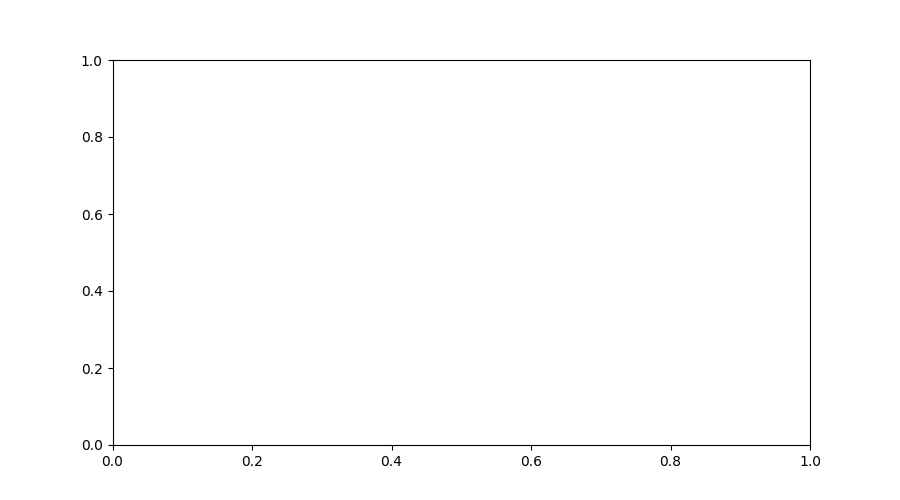

In [79]:
BGO_abs, BGO_intr = plot_efficiencies("BGO", Am_results, result_array, Co_results, Cs_results)

In [109]:
def angle_efficiencies(detector, source_results_array, angle_array):
  """
    hard coded for Americium ONLY that's the source we did angle measurements on
  """
  # Americium has 1 Peak
  # Americium Values
  Am241_SA = 11.16 #microCurie
  Am241_HL = 432.2

  # Detector Diameter (from Datasheets)
  BGO_r = 2*2.54 # cm circular
  NaI_r = 2*2.54 # cm circular BUT NOT FROM CORRECT BIT OF DATASHEET
  CdTe_r = 3/10 # cm square

  # Detector Surface Area (cm**2)
  BGO_area = np.pi*(BGO_r**2)
  NaI_area = np.pi*(NaI_r**2)
  CdTe_area = CdTe_r**2

  # Source Distance to Detector (from Eris's measurements)
  BGO_d = 15 #cm
  NaI_d = 16 #cm
  CdTe_d = 10 #cm

  # Years since December 1st 1979 till Oct 21st (BGO) Oct 28th (NaI) and Nov 4 (CdTe)
  from datetime import datetime

  # Google Gemini generated code I turned into a function
  # (was going to just google: how long since __ but this is nicer)
  def how_long_yrs(date0, date1):
    from datetime import datetime

    # Calculate the difference
    difference = date1 - date0

    # Extract the years
    years = difference.days / 365

    return years

  # When we ran each detector
  date_start = datetime(1979, 12, 1)
  date_BGO = datetime(2025, 10, 21)
  date_NaI = datetime(2025, 10, 28)
  date_CdTe = datetime(2025, 11, 4)

  years_BGO = how_long_yrs(date_start, date_BGO)
  years_NaI = how_long_yrs(date_start, date_NaI)
  years_CdTe = how_long_yrs(date_start, date_CdTe)

  # Create function that calculates current activity
  def activity_now(init_activity, half_life, time):
    import numpy as np

    current_activity = init_activity*np.exp(-(np.log(2)*time)/half_life)

    return current_activity

  if "BGO" in detector:
    # Current Activity
    Am_CA = activity_now(Am241_SA, Am241_HL, years_BGO)*37000

    # Geometric Factor
    G0 = BGO_area / (4*np.pi*BGO_d**2)

  if "NaI" in detector:
    # Current Activity
    Am_CA = activity_now(Am241_SA, Am241_HL, years_NaI)*37000

    # Geometric Factor
    G0 = NaI_area / (4*np.pi*NaI_d**2)

  if "CdTe" in detector:
    # Current Activity
    Am_CA = activity_now(Am241_SA, Am241_HL, years_CdTe)*37000

    # Geometric Factor
    G0 = CdTe_area / (4*np.pi*CdTe_d**2)

  # Index for results array
  i = 0

  # Initialize lists, include direct observation
  #abs_eff_dir, intr_eff_dir = find_efficiencies("BGO", "AM", direct_results)
  abs_eff = []
  intr_eff = []

  for angle in angle_array:

    # Peak Total Counts Detected (in cps)
    results = source_results_array[i]
    print(results)
    Am_counts = results[0].params['amplitude'].value

    # Geometric Factor with Angle
    if angle == 90:
      G0_ang = G0
    else:
      G0_ang = np.cos((angle*np.pi)/180)*G0

    # Emmission Fraction
    Am_em_frac = 0.3578

    # Absolute Efficiency
    Am_abs_eff = Am_counts / (Am_CA * Am_em_frac)
    abs_eff.append(Am_abs_eff)

    # Intrinsic Efficiency
    Am_intr_eff = Am_counts / (Am_CA * G0_ang * Am_em_frac)
    intr_eff.append(Am_intr_eff)

    i += 1

  # Plot Angle vs Efficiencies
  fig, ax = plt.subplots(figsize=(9,5))
  #ax.scatter(angle_array, abs_eff, linestyle = "-")
  plt.plot(angle_array, abs_eff, '-o')
  ax.set_xticks(np.arange(0,100,10))
  plt.xlabel(f'{detector} Detector Angle off Normal (deg)')
  plt.ylabel(f'{detector} Absolute Efficiency')
  plt.title(f'{detector} Americium Absolute Efficiency vs Angle')

  fig, ax = plt.subplots(figsize=(9,5))
  #ax.scatter(angle_array, intr_eff,linestyle = "-")
  plt.plot(angle_array, intr_eff, '-o')
  ax.set_xticks(np.arange(0,100,10))
  plt.xlabel(f'{detector} Detector Angle off Normal (deg)')
  plt.ylabel(f'{detector} Intrinsic Efficiency')
  plt.title(f'{detector} Americium Intrinsic Efficiency vs Angle')

  return abs_eff, intr_eff

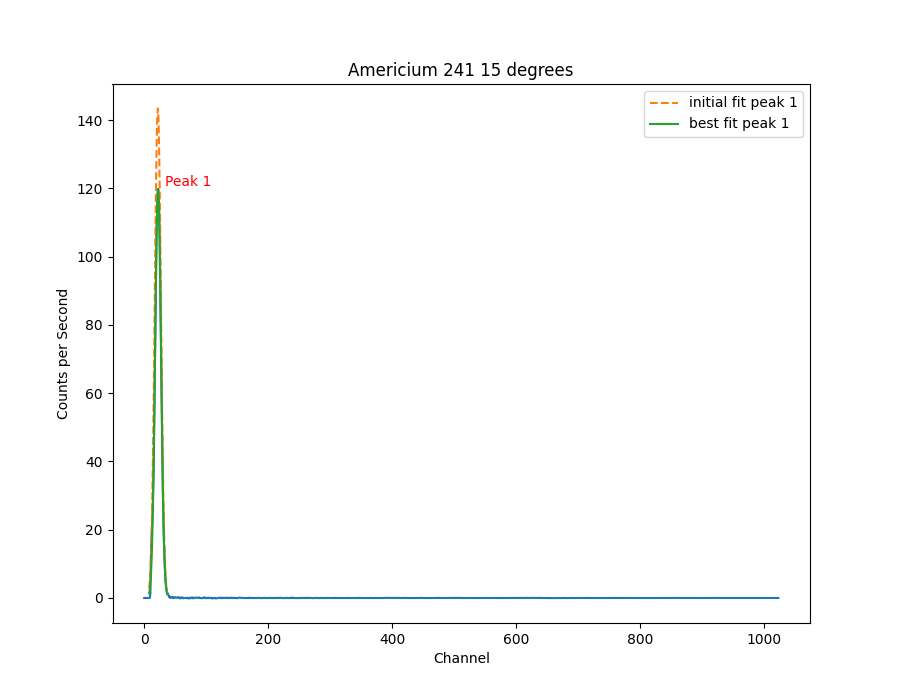

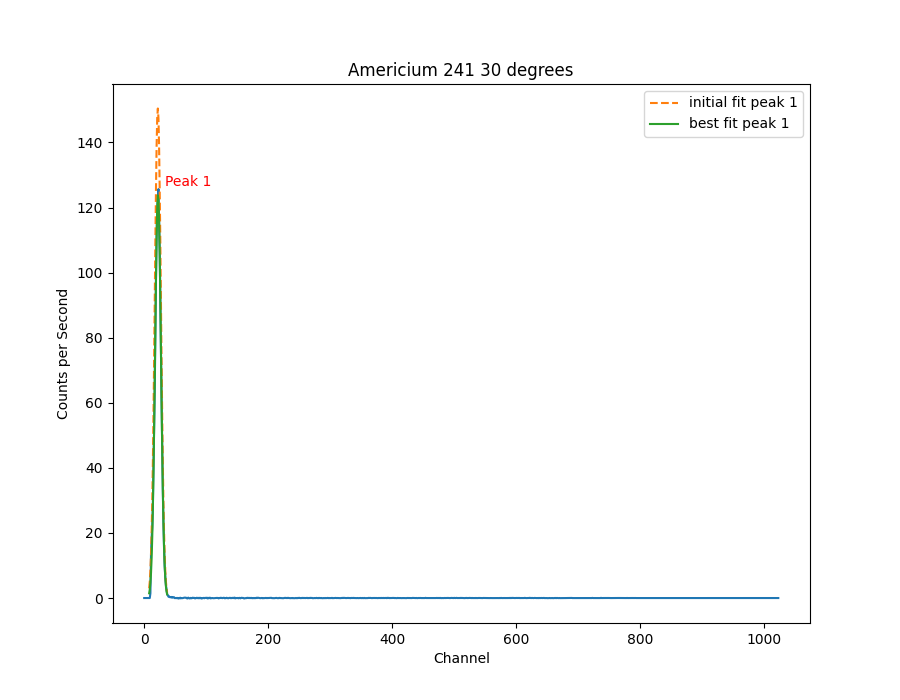

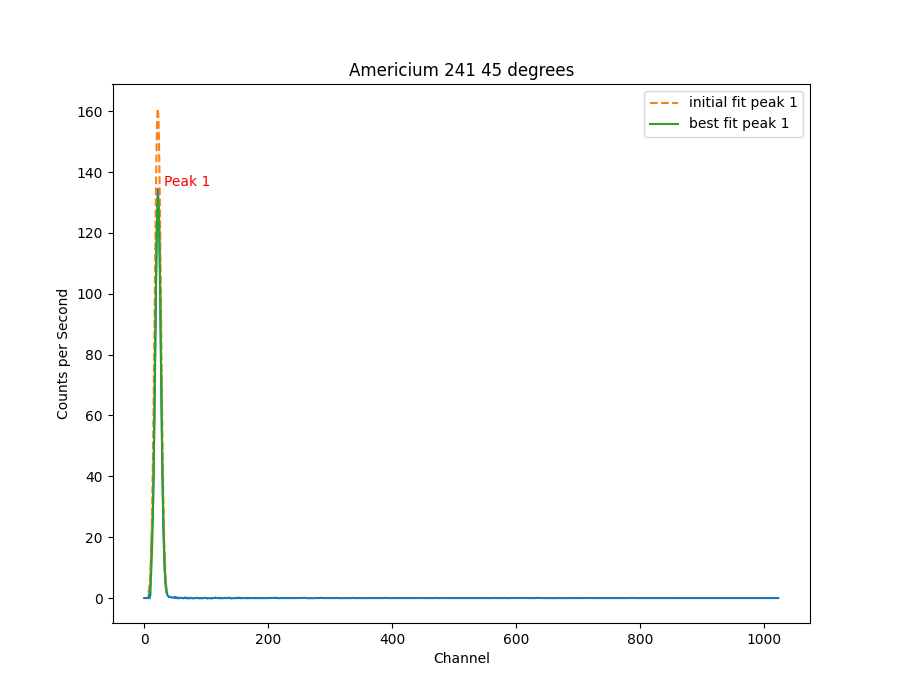

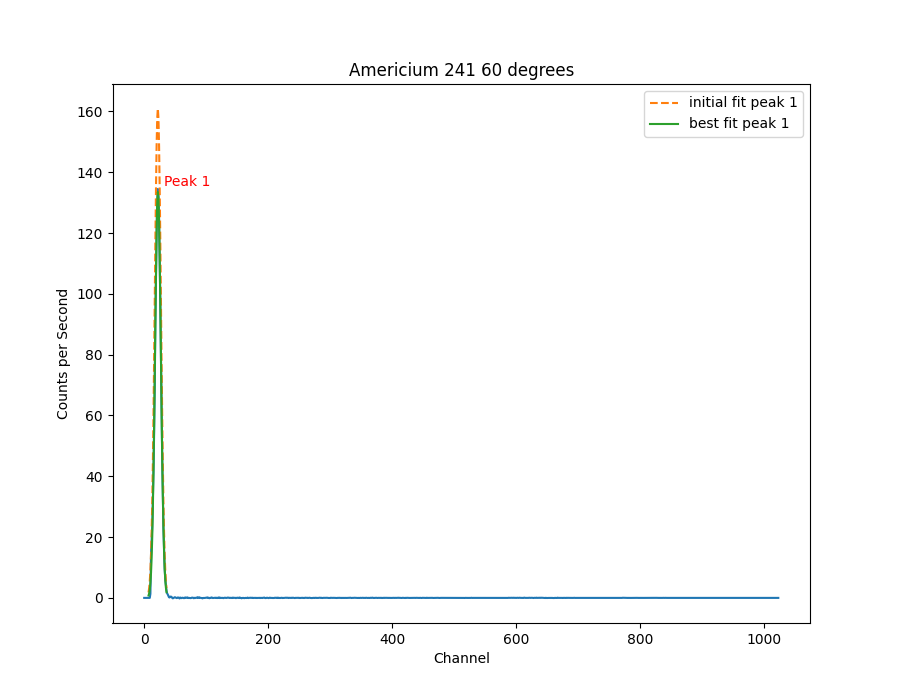

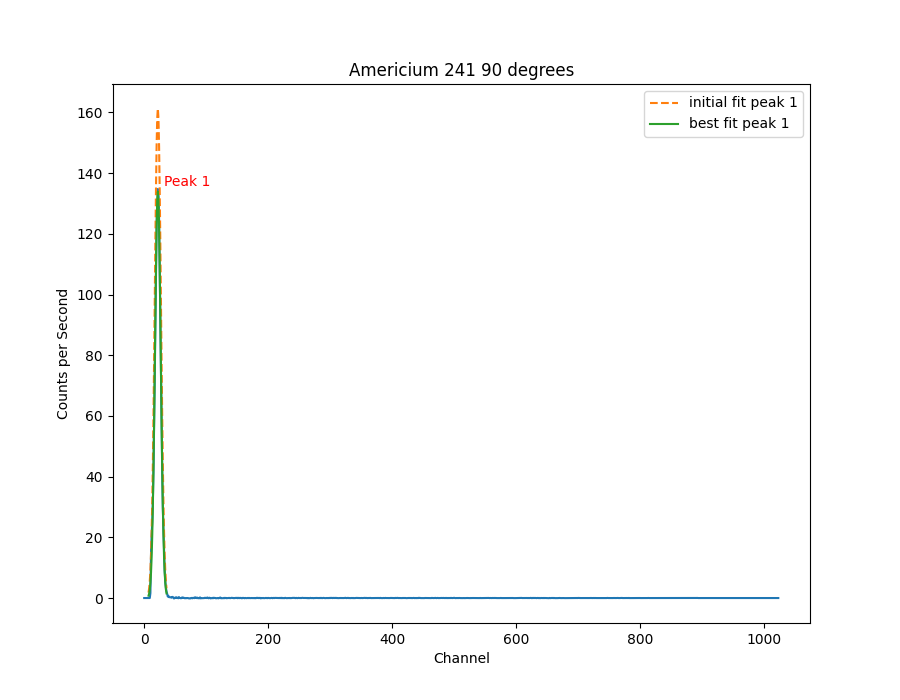

In [82]:
## Angle Efficiencies Plot

# Load BGO Am Angle Spectrums
# Load Data
Am15_data, Am15_data_head = Spe_parser('BGO_Am_241_15deg.Spe')
Am30_data, Am30_data_head = Spe_parser('BGO_Am_241_30deg.Spe')
Am45_data, Am45_data_head = Spe_parser('BGO_Am_241_45deg.Spe')
Am60_data, Am60_data_head = Spe_parser('BGO_Am241_60deg.Spe')
Am90_data, Am90_data_head = Spe_parser('BGO_Am_241_90deg.Spe')

# Remove the background
Am15_data_adj = (Am15_data - bck_data).flatten()
Am30_data_adj = (Am30_data - bck_data).flatten()
Am45_data_adj = (Am45_data - bck_data).flatten()
Am60_data_adj = (Am60_data - bck_data).flatten()
Am90_data_adj = (Am90_data - bck_data).flatten()

# Find Gaussian Results
Am15_results, Am_centroids = peak_gauss(x_range, Am15_data_adj, 15, 15, 'Americium 241 15 degrees')
Am30_results, Am_centroids = peak_gauss(x_range, Am30_data_adj, 15, 15, 'Americium 241 30 degrees')
Am45_results, Am_centroids = peak_gauss(x_range, Am45_data_adj, 15, 15, 'Americium 241 45 degrees')
Am60_results, Am_centroids = peak_gauss(x_range, Am60_data_adj, 15, 15, 'Americium 241 60 degrees')
Am90_results, Am_centroids = peak_gauss(x_range, Am90_data_adj, 15, 15, 'Americium 241 90 degrees')


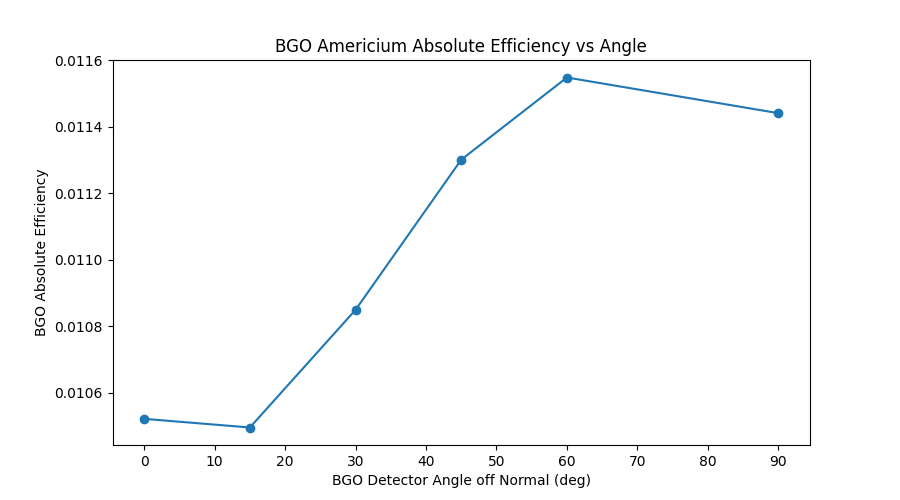

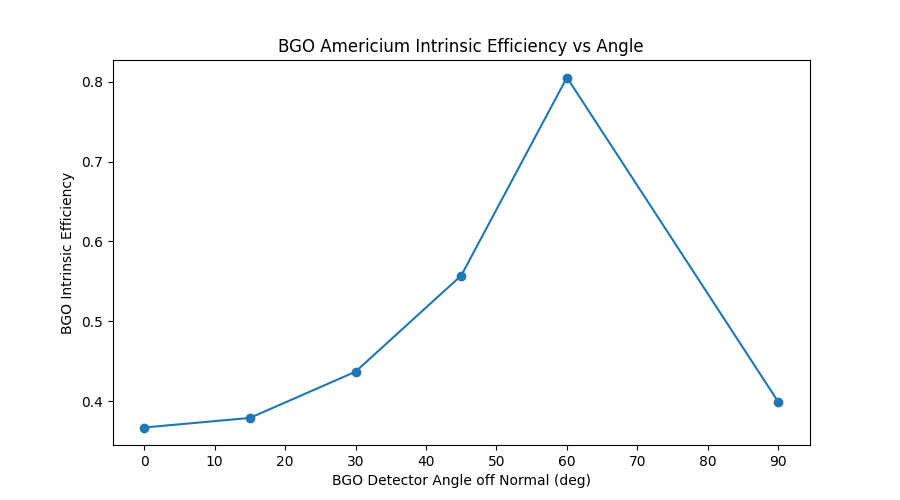

In [110]:
# Run Angle Efficiency Function
plt.close("all")

# Initialize Inputs
angles_array = [0, 15, 30, 45, 60, 90]
source_results_array = [Am_results, Am15_results, Am30_results, Am45_results, Am60_results, Am90_results]
detector = "BGO"

# Lol lets see if it works
BGO_abs_eff, BGO_intr_eff = angle_efficiencies(detector, source_results_array, angles_array)

In [87]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [89]:
BGO_intr_eff

[np.float64(0.36693028850256465),
 np.float64(0.37893369197761406),
 np.float64(0.43690565508389073),
 np.float64(0.5573712343759295),
 np.float64(0.8054893360172295),
 np.float64(0.3990028112736876)]

In [90]:
BGO_abs_eff

[np.float64(0.010521277552458427),
 np.float64(0.010495228888561007),
 np.float64(0.010849337336686407),
 np.float64(0.011300937382754908),
 np.float64(0.01154821111166391),
 np.float64(0.011440917943170323)]

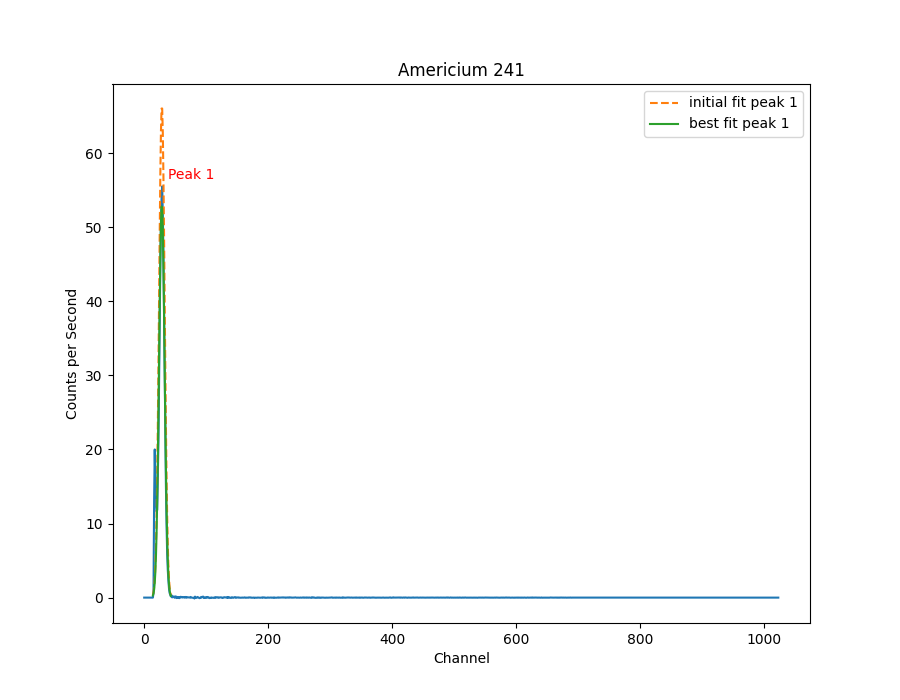

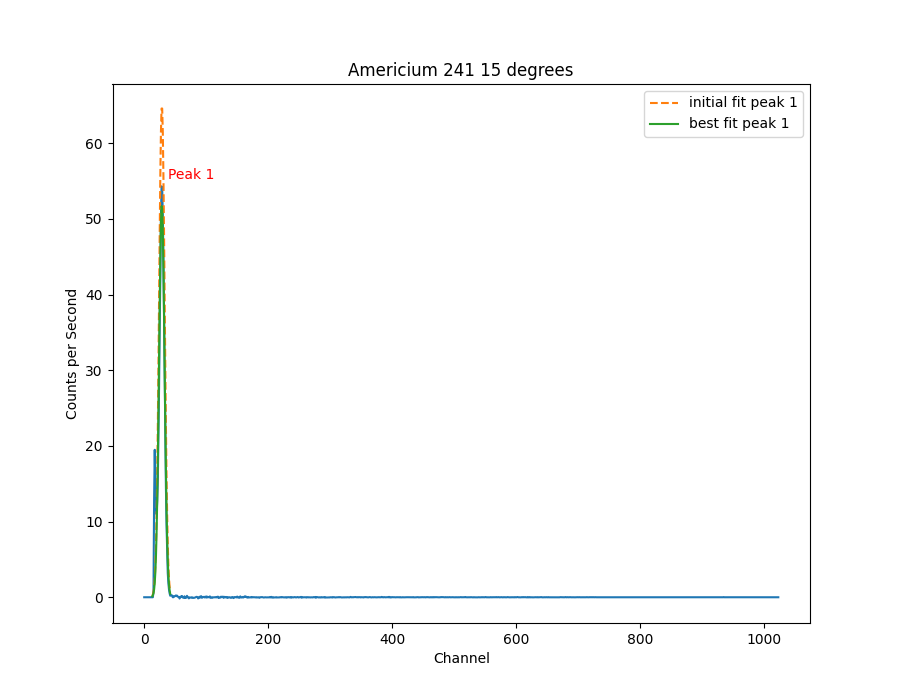

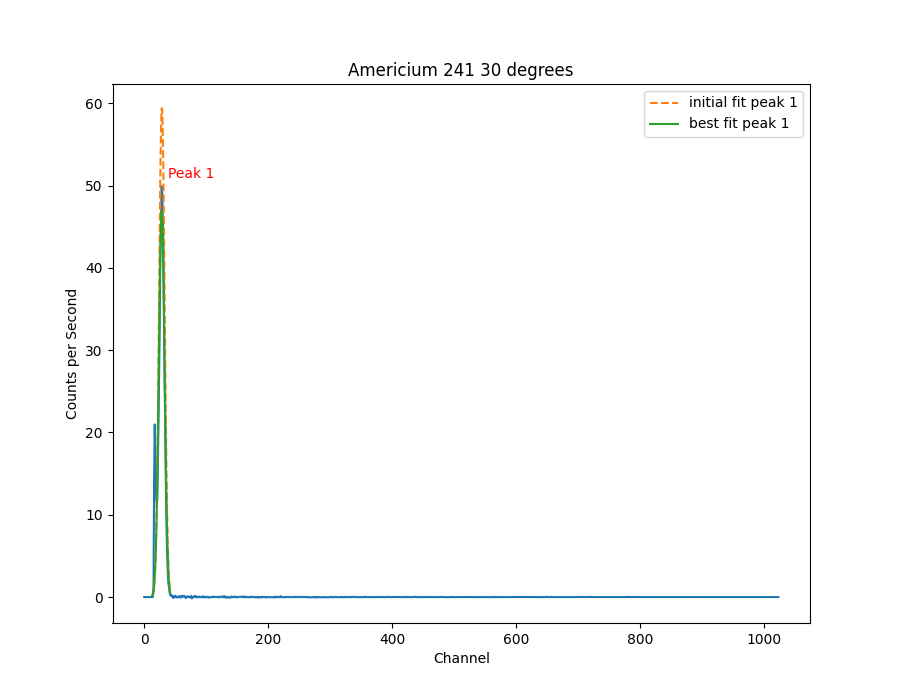

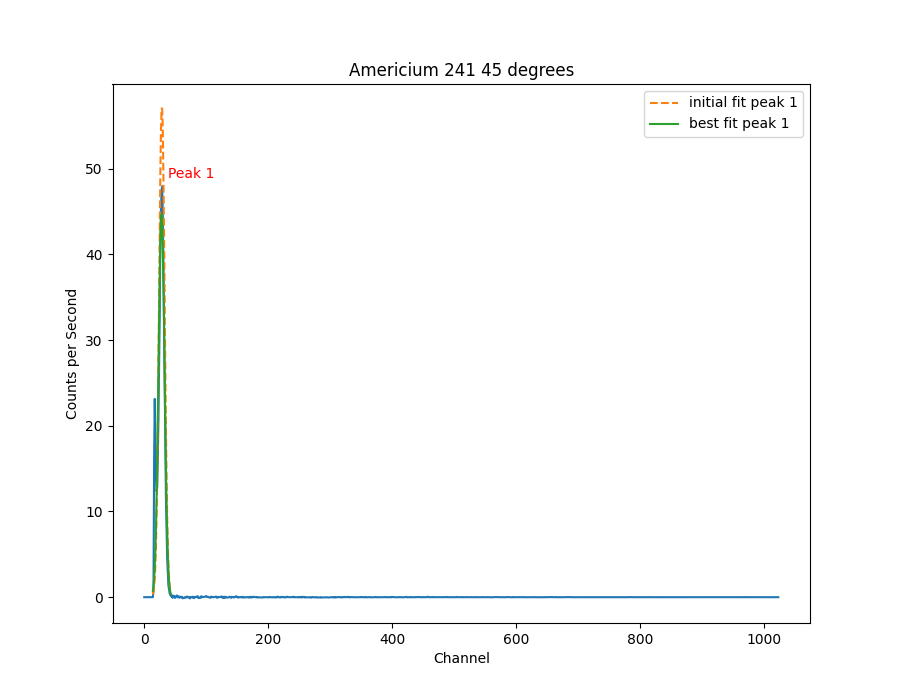

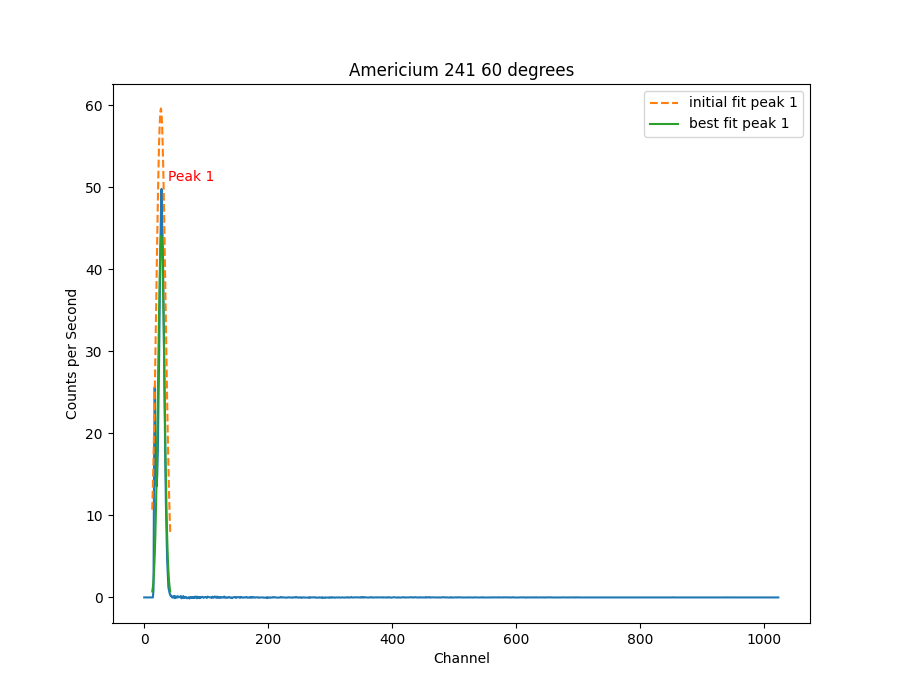

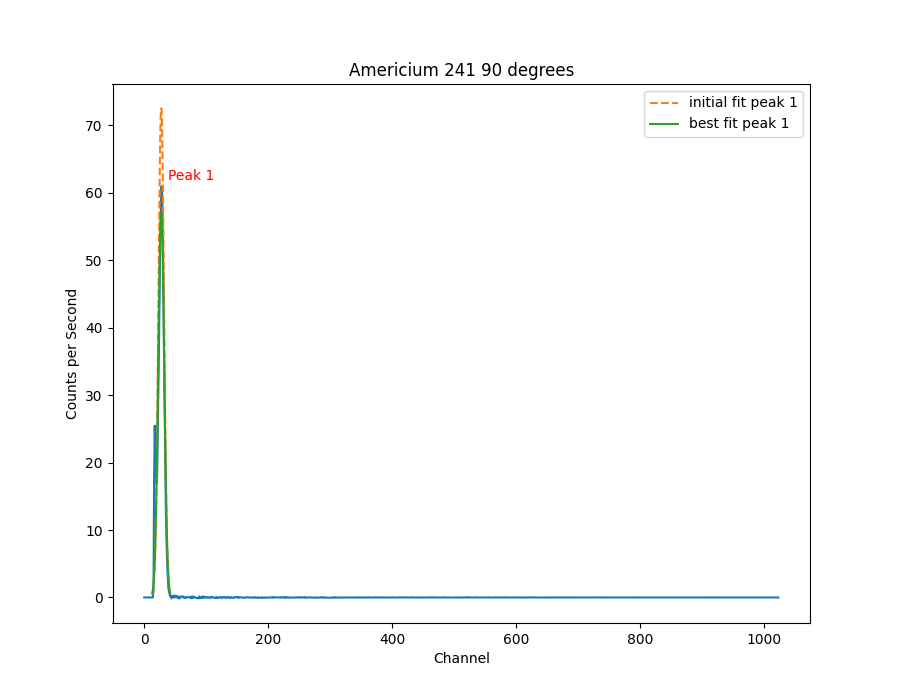

In [105]:
## NaI Detector Off Angle
# Load Data
NaI_direct_data, NaI15_direct_data_head = Spe_parser('NaI_Am_direct.Spe')
NaI15_data, NaI15_data_head = Spe_parser('NaI_Am_15deg.Spe')
NaI30_data, NaI30_data_head = Spe_parser('NaI_Am_30deg.Spe')
NaI45_data, NaI45_data_head = Spe_parser('NaI_Am_45deg.Spe')
NaI60_data, NaI60_data_head = Spe_parser('NaI_Am_60deg.Spe')
NaI90_data, NaI90_data_head = Spe_parser('NaI_Am_90deg.Spe')

# Remove the background
NaI_bck_data, NaI_bck_data_head = Spe_parser("NaI_bck_10min.Spe")

NaI_direct_data_adj = (NaI_direct_data - NaI_bck_data).flatten()
NaI15_data_adj = (NaI15_data - NaI_bck_data).flatten()
NaI30_data_adj = (NaI30_data - NaI_bck_data).flatten()
NaI45_data_adj = (NaI45_data - NaI_bck_data).flatten()
NaI60_data_adj = (NaI60_data - NaI_bck_data).flatten()
NaI90_data_adj = (NaI90_data - NaI_bck_data).flatten()

# Find Gaussian Results
NaI_dir_results, NaI_centroids = peak_gauss(x_range, NaI_direct_data_adj, 15, 15, 'Americium 241')
NaI15_results, NaI_centroids = peak_gauss(x_range, NaI15_data_adj, 15, 15, 'Americium 241 15 degrees')
NaI30_results, NaI_centroids = peak_gauss(x_range, NaI30_data_adj, 15, 15, 'Americium 241 30 degrees')
NaI45_results, NaI_centroids = peak_gauss(x_range, NaI45_data_adj, 15, 15, 'Americium 241 45 degrees')
NaI60_results, NaI_centroids = peak_gauss(x_range, NaI60_data_adj, 15, 15, 'Americium 241 60 degrees')
NaI90_results, NaI_centroids = peak_gauss(x_range, NaI90_data_adj, 15, 15, 'Americium 241 90 degrees')

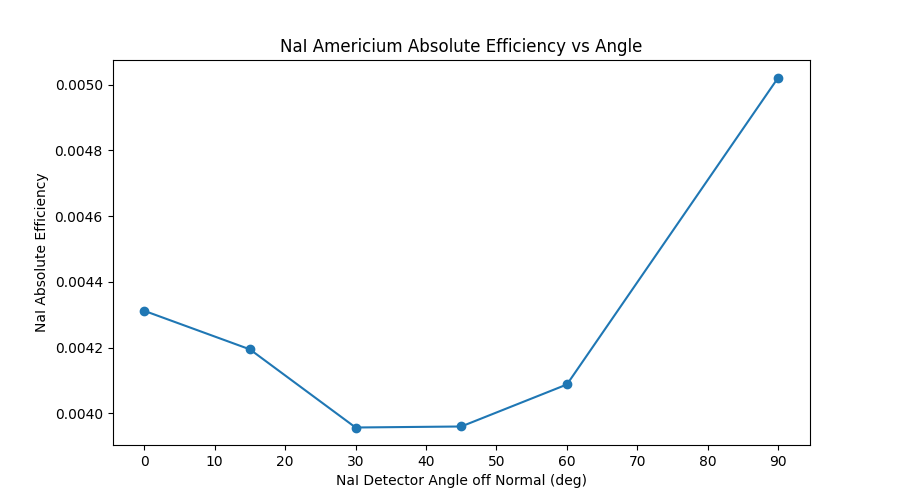

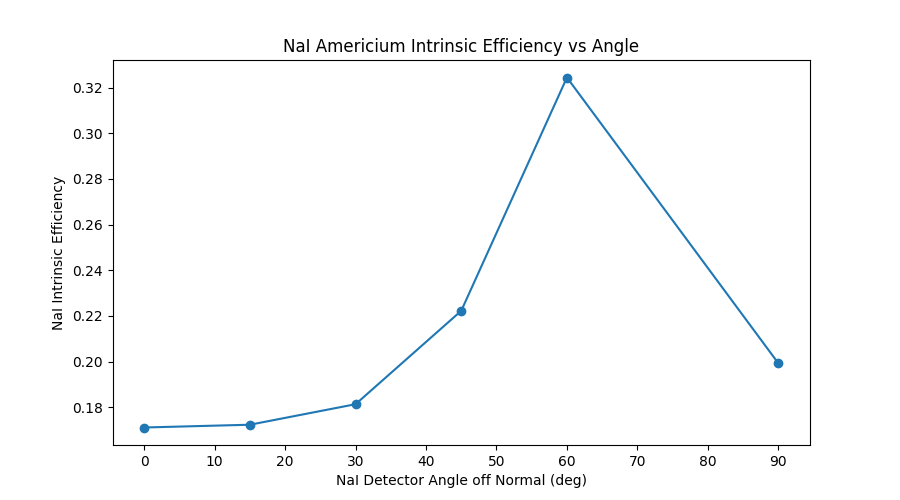

In [108]:
# Run Angle Efficiency Function
plt.close("all")

# Initialize Inputs
NaI_angles_array = [0, 15, 30, 45, 60, 90]
NaI_source_results_array = [NaI_dir_results, NaI15_results, NaI30_results, NaI45_results, NaI60_results, NaI90_results]

# Lol lets see if it works
NaI_abs_eff, NaI_intr_eff = angle_efficiencies("NaI", NaI_source_results_array, NaI_angles_array)

In [107]:
NaI_source_results_array

[[<lmfit.model.ModelResult at 0x7e863bc3edb0>],

In [103]:
NaI_abs_eff

[np.float64(0.004311997611025678),
 np.float64(0.004194680356643029),
 np.float64(0.003956985940315944),
 np.float64(0.003960048572516565),
 np.float64(0.004087910725320796),
 np.float64(0.005021687654914885)]

In [104]:
NaI_intr_eff

[np.float64(0.17110040740631374),
 np.float64(0.17231680208981487),
 np.float64(0.18130359161825577),
 np.float64(0.22222250699372872),
 np.float64(0.32441724399594635),
 np.float64(0.19926096466895202)]

In [ ]:
results2 = source_results_array[0]
results2[0].params

In [ ]:

  #   if "BGO" in detector:
  #   # Find Current Activity of Source (convert from millicurie to cps)
  #   Am_CA = activity_now(Am241_SA, Am241_HL, years_BGO)*37000
  #   Ba_CA = activity_now(Ba133_SA, Ba133_HL, years_BGO)*37000
  #   Cs_CA = activity_now(Cs137_SA, Cs137_HL, years_BGO)*37000
  #   Co_CA = activity_now(Co60_SA, Co60_HL, years_BGO)*37000

  #   # Geometric Factor
  #   G0 = BGO_area / (4*np.pi*BGO_d**2)

  # elif "NaI" in detector:
  #   # Find Current Activity of Source (convert from millicurie to cps)
  #   Am_CA = activity_now(Am241_SA, Am241_HL, years_NaI)*37000
  #   Ba_CA = activity_now(Ba133_SA, Ba133_HL, years_NaI)*37000
  #   Cs_CA = activity_now(Cs137_SA, Cs137_HL, years_NaI)*37000
  #   Co_CA = activity_now(Co60_SA, Co60_HL, years_NaI)*37000

  #   if "AM" in source:
  #     # Americium has 1 Peak
  #     Am_counts = source_results[0].params['amplitude'].value

  #     # Absolute Efficiency
  #     Am_abs_eff = Am_counts / Am_CA
  #     abs_eff.append(Am_abs_eff)

  #     #Intrinsic Efficiency

  #   elif "BA" in source:
  #     # Barium has 3 Peaks
  #     for result in source_results
  #       Ba_counts = result.params['amplitude'].value
  #       Ba_abs_eff = Ba_counts / Ba_CA
  #       abs_eff.append(Ba_abs_eff)

  #   elif "CS" in source
  #     # Cesium has 1 Peak
  #     Cs_counts = source_results[0].params['amplitude'].value
  #     Cs_abs_eff = Cs_counts / Cs_CA
  #     abs_eff.append(Cs_abs_eff)

  #   elif "CO" in source
  #     # Cobalt has 2 Peaks
  #     for result in source_results
  #       Co_counts = result.params['amplitude'].value
  #       Co_abs_eff = Co_counts / Ba_CA
  #       abs_eff.append(Co_abs_eff)

  # elif "CdTe" in detector:
  #   # Find Current Activity of Source (convert from millicurie to cps)
  #   Am_CA = activity_now(Am241_SA, Am241_HL, years_CdTe)*37000
  #   Ba_CA = activity_now(Ba133_SA, Ba133_HL, years_CdTe)*37000
  #   Cs_CA = activity_now(Cs137_SA, Cs137_HL, years_CdTe)*37000
  #   Co_CA = activity_now(Co60_SA, Co60_HL, years_CdTe)*37000
  #   Cs_energies = [31.85]

  #   if "AM" in source:
  #     # Americium has 1 Peak
  #     Am_counts = source_results[0].params['amplitude'].value
  #     Am_abs_eff = Am_counts / Am_CA
  #     abs_eff.append(Am_abs_eff)

  #   elif "BA" in source:
  #     # Barium has 3 Peaks
  #     for result in source_results
  #       Ba_counts = result.params['amplitude'].value
  #       Ba_abs_eff = Ba_counts / Ba_CA
  #       abs_eff.append(Ba_abs_eff)

  #   elif "CS" in source
  #     # Cesium has 1 Peak
  #     Cs_counts = source_results[0].params['amplitude'].value
  #     Cs_abs_eff = Cs_counts / Cs_CA
  #     abs_eff.append(Cs_abs_eff)

  #   elif "CO" in source
  #     # Cobalt has 2 Peaks
  #     for result in source_results
  #       Co_counts = result.params['amplitude'].value
  #       Co_abs_eff = Co_counts / Ba_CA
  #       abs_eff.append(Co_abs_eff)


In [ ]:
for result in Cs_results:
  print(result.params['amplitude'].value)


In [ ]:
# returns efficiencies and then we plot them and fit the energy for each detector

In [ ]:
Am241_BGO_ie

In [ ]:
Am_results[0].params['amplitude'].value

In [ ]:
print(f'{Am241_CA*37000*0.3578:0.2e}')

In [ ]:
Am241_BGO_intre2

In [ ]:
tryit2 = np.array([3, 4, 5, 7, 10])
max(tryit2)

In [ ]:
Am241_BGO_intre

In [ ]:
## Energy Resolution
# Resolution at some peak  = FWHM / peak's energy
# supposed to make it a function of energy? ?? maybe plot resolution vs the energy

# Calculate Resolution
Am241_BGO_Res = (Am_results[0].params['fwhm'].value)/Am_energies[0]
#Ba133_BGO_Res

In [ ]:
Am241_BGO_Res

In [ ]:
Am_energies

In [ ]:
Am_results[0].params['fwhm'].value

In [ ]:
Am_results[0]

In [ ]:
print(Am241_CA)

In [ ]:
Am241_counts

In [ ]:
years_BGO

In [ ]:
## Error Propagation
# Get centroid error from gaussian fit
# result.params['centroid'].stderr

# Get linear fit error from linear fit results
# but I'm I can bring over my gaussian error and propagate to the linear fit results,
# but what is the linear fit error I am given??


In [ ]:
## Full Width Half Max ???????????????? what THE fuCK

In [ ]:
data_head

In [ ]:
Co_results

In [ ]:
Cs_centroids

In [ ]:
Cs_channels

In [ ]:
result_array

In [ ]:
Bacentroid_result

In [ ]:
result_array[0].params['center'].value

In [ ]:
v3 = 'v3'
label = f'your {v3}'
print(label)

In [ ]:
yolo = np.array([1 , 2 , 4])
#yolo.index(2)
numwhere = np.where(yolo== 2)
int(numwhere[0])

4 files
each named after the isotope
each txt files with
- regions of interest for each detector(where peaks should be channels)
- corresponding energy for that region of interest
yamL files create dictionary
roi:
  CdTe:
      [30,60]


can also hard code he doesn't care


In [ ]:
## STuipid Error Propagation
# Well lmfit will give us the gaussian fit error (boo)
# and then linearfit should give us an error for the linear fit as well (yuck)
# and then we just need to google how to propagate that shit (diGUSting)


## THat freaking Efficiency shit
# Just gotta look it up in the student handbook I will do that sometime before Tuesday

In [ ]:
Cs_results[0]

you should present for each detector

the calibration curve,

the efficiency as a function of energy,

and the absolute efficiency,

intrinsic efficiency,

and geometric factors as functions of angle.

You do not need to show every single spectra you obtained:
a wise choice would be to include an example of a single fitted spectra for each detector, and include any
other spectra you feel important in an appendix at the end of the report.

You should also include tables
containing the fitted parameters and uncertainties in an append

In [ ]:
# absolute
# from downstairs data
# get source activity from 1979 calculate halflife for now
# convert mcuries to photons per second
# divide total counts gotten by detector by activity

# intrinsic
# total counts of detector divided by how much the detector gets
# so distance of detector and how many counts pass through that surface area of detector

In [1]:
## Below Code is from Github Copilot, they figured out a solution of efficiencies
## & we looked at it to try and reverse-engineer it cause some stuff I did not understand

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from lmfit.models import GaussianModel, LinearModel

# ---------------------------
# Existing Spe_parser from your notebook (unchanged)
# ---------------------------
def Spe_parser(filename):
    data_head = {}
    data = []
    with open(filename) as file:
        lines = file.readlines()
        ind = list(range(0,len(lines),1))
        for val in ind:
            line = lines[val].strip()
            if line.startswith('$'):
                line = line.replace("$", "").strip()
                value = lines[val+1].strip()
                data_head.update({line: value})
            else:
                try:
                    counts = list(map(float, line.split(',')))
                    data.append(counts)
                except ValueError:
                    pass
    z , cutoff = data_head['DATA:'].split(' ')
    cutoff = int(cutoff)
    data = data[:1023+1]
    secs , deadsecs  = data_head['MEAS_TIM:'].split(' ')
    data = np.array(data)/int(secs)
    return data, data_head

# ---------------------------
# Utility functions for calibration and characterization
# ---------------------------

def fit_calibration(channels, energies, plot=True):
    """
    Fit linear and quadratic calibration curves mapping channel -> energy.
    channels, energies: 1D arrays of same length
    Returns: dict with linear fit coeffs, cov, quadratic coeffs, cov, and chosen model ('linear' preferred)
    """
    # ensure numpy arrays
    channels = np.asarray(channels, dtype=float)
    energies = np.asarray(energies, dtype=float)

    # Linear fit (E = c1*channel + c0)
    p_lin, cov_lin = np.polyfit(channels, energies, 1, cov=True)
    # p_lin is [slope, intercept] in numpy poly convention
    slope, intercept = p_lin[0], p_lin[1]
    perr_lin = np.sqrt(np.diag(cov_lin))

    # Quadratic fit to test linearity
    p_quad, cov_quad = np.polyfit(channels, energies, 2, cov=True)
    perr_quad = np.sqrt(np.diag(cov_quad))

    # Choose model: check whether quadratic term is consistent with zero
    quad_coeff = p_quad[0]
    quad_err = perr_quad[0]
    # basic decision: if |coeff| < 3 sigma -> linear is OK
    use_linear = abs(quad_coeff) < 3*quad_err

    results = {
        'linear': {'coeffs': p_lin, 'cov': cov_lin, 'stderr': perr_lin},
        'quadratic': {'coeffs': p_quad, 'cov': cov_quad, 'stderr': perr_quad},
        'use_linear': use_linear
    }

    if plot:
        xfit = np.linspace(min(channels)-5, max(channels)+5, 300)
        E_lin = np.polyval(p_lin, xfit)
        E_quad = np.polyval(p_quad, xfit)
        plt.figure(figsize=(8,5))
        plt.scatter(channels, energies, s=60, label='Calibration points')
        plt.plot(xfit, E_lin, '-r', label=f'Linear fit: E={p_lin[0]:.5f}ch + {p_lin[1]:.3f}')
        plt.plot(xfit, E_quad, '--g', label=f'Quadratic fit (test)')
        plt.xlabel('Channel')
        plt.ylabel('Energy (keV)')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.title('Energy calibration: Channel -> Energy')
        plt.show()

        # residuals for linear fit
        residues_lin = energies - np.polyval(p_lin, channels)
        plt.figure(figsize=(8,3))
        plt.axhline(0, color='k', lw=0.8)
        plt.scatter(channels, residues_lin)
        plt.xlabel('Channel')
        plt.ylabel('Residual (keV)')
        plt.title('Linear fit residuals')
        plt.grid(alpha=0.3)
        plt.show()

    return results

In [ ]:
def compute_peak_area_fwhm(result):
    """
    Given an lmfit GaussianModel fit result (for a single peak), return:
     - area (counts/sec)
     - area uncertainty (if available)
     - fwhm (in channels)
     - fwhm uncertainty (if available)
    It handles either parameter 'amplitude' (area) or computes area by summing best_fit.
    """
    params = result.params
    # amplitude in lmfit GaussianModel is area under curve when using 'amplitude' param
    if 'amplitude' in params:
        area = params['amplitude'].value
        area_err = params['amplitude'].stderr if params['amplitude'].stderr is not None else np.nan
    else:
        # fallback: integrate the best_fit over x
        try:
            x = result.userkws.get('x') if 'x' in result.userkws else None
            if x is None:
                # try parsing from result.best_fit / result.init_fit lengths -> assume x indices
                n = len(result.best_fit)
                x = np.arange(n)
            area = np.trapz(result.best_fit, x)
            area_err = np.nan
        except Exception:
            area = np.nan
            area_err = np.nan

    # fwhm: try direct param, otherwise compute from sigma
    if 'fwhm' in params:
        fwhm = params['fwhm'].value
        fwhm_err = params['fwhm'].stderr if params['fwhm'].stderr is not None else np.nan
    elif 'sigma' in params:
        sigma = params['sigma'].value
        sigma_err = params['sigma'].stderr if params['sigma'].stderr is not None else np.nan
        fwhm = sigma * 2.0 * np.sqrt(2.0 * np.log(2.0))
        fwhm_err = sigma_err * 2.0 * np.sqrt(2.0 * np.log(2.0)) if not np.isnan(sigma_err) else np.nan
    else:
        fwhm = np.nan
        fwhm_err = np.nan

    return {'area': area, 'area_err': area_err, 'fwhm': fwhm, 'fwhm_err': fwhm_err}

In [ ]:
def compute_efficiencies(peak_infos, source_info, detector_geom, angles_deg=[0.0], plot=True):
    """
    Compute absolute and intrinsic efficiencies.
    peak_infos: list of dicts per peak: {'result': lmfit_result, 'energy_keV': float, 'isotope': 'Cs137', 'branching_ratio': 0.85 (optional)}
    source_info: dict with keys:
      - 'activity_Bq': source activity in Bq (decays/sec) at time of measurement
      - 'branching_ratio': default emission probability per decay for the gamma used (if not provided per peak)
    detector_geom: dict with keys:
      - 'area_m2' : physical detector face area in m^2 (projected area)
      - 'distance_m' : source-detector distance in m (point source)
    angles_deg: list of angles (deg) to evaluate geometric factor using A_proj = A * cos(theta)
    Returns dict with arrays and plots
    Notes:
      - absolute_efficiency = counts_rate / (activity_Bq * branching_ratio)
      - intrinsic_efficiency = counts_rate / (activity_Bq * branching_ratio * G)
      - geometric factor G = A_proj / (4π d^2)
    """
    activity = source_info.get('activity_Bq', None)
    global_br = source_info.get('branching_ratio', 1.0)

    A = detector_geom.get('area_m2', None)
    d = detector_geom.get('distance_m', None)
    if activity is None or A is None or d is None:
        raise ValueError("Please supply activity_Bq, area_m2 and distance_m in source_info / detector_geom")

    energies = []
    areas_counts_per_s = []
    areas_err = []
    branching = []
    for p in peak_infos:
        res = p['result']
        info = compute_peak_area_fwhm(res)
        area = info['area']  # counts per second (since your data were normalized by measurement time earlier)
        area_err = info['area_err']
        br = p.get('branching_ratio', p.get('branching', global_br))
        energies.append(p['energy_keV'])
        areas_counts_per_s.append(area)
        areas_err.append(area_err if area_err is not None else np.nan)
        branching.append(br)

    energies = np.array(energies, dtype=float)
    areas_counts_per_s = np.array(areas_counts_per_s, dtype=float)
    areas_err = np.array(areas_err, dtype=float)
    branching = np.array(branching, dtype=float)

    # Compute geometric factor for angles
    angles = np.deg2rad(np.array(angles_deg, dtype=float))
    G_angles = []
    A_proj = A  # face area for theta=0
    for theta in angles:
        A_theta = A_proj * np.cos(theta)
        G = A_theta / (4.0 * np.pi * (d**2))
        G_angles.append(G)
    G_angles = np.array(G_angles)

    # compute efficiencies for theta=0 (and return function of angle easily)
    eps_abs = areas_counts_per_s / (activity * branching)   # counts/sec divided by photons emitted/sec
    # intrinsic uses G for theta=0
    G0 = G_angles[0]
    eps_intrinsic = areas_counts_per_s / (activity * branching * G0)

    if plot:
        # Efficiency vs Energy (absolute)
        plt.figure(figsize=(7,5))
        plt.scatter(energies, eps_abs, s=60)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Energy (keV)')
        plt.ylabel('Absolute efficiency (ε_abs)')
        plt.title('Absolute efficiency vs Energy')
        plt.grid(alpha=0.3, which='both')
        plt.show()

        # Intrinsic efficiency vs Energy (log-log fit)
        lnE = np.log(energies)
        ln_eps = np.log(eps_intrinsic)
        # fit quadratic in lnE: lnε = a + b lnE + c (lnE)^2
        p = np.polyfit(lnE, ln_eps, 2)
        lnE_fit = np.linspace(lnE.min()*0.9, lnE.max()*1.1, 200)
        plt.figure(figsize=(7,5))
        plt.scatter(energies, eps_intrinsic, label='Data')
        Efit = np.exp(lnE_fit)
        eps_fit = np.exp(np.polyval(p, lnE_fit))
        plt.plot(Efit, eps_fit, '-r', label=f'lnε fit: a={p[2]:.3f}, b={p[1]:.3f}, c={p[0]:.3f}')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Energy (keV)')
        plt.ylabel('Intrinsic efficiency (ε_intr)')
        plt.legend()
        plt.grid(alpha=0.3, which='both')
        plt.title('Intrinsic efficiency vs Energy (log-log)')
        plt.show()

        # Efficiency vs angle (for the strongest peak, example)
        if len(areas_counts_per_s) > 0:
            idx = np.argmax(areas_counts_per_s)  # use largest-count peak as example
            eps_intrinsic_angles = areas_counts_per_s[idx] / (activity * branching[idx] * G_angles)
            plt.figure(figsize=(7,4))
            plt.plot(angles_deg, eps_intrinsic_angles, 'o-')
            plt.xlabel('Angle (deg)')
            plt.ylabel('Intrinsic efficiency (ε_intr)')
            plt.title('Intrinsic efficiency vs Angle (example peak)')
            plt.grid(alpha=0.3)
            plt.show()

    out = {
        'energies_keV': energies,
        'areas_counts_per_s': areas_counts_per_s,
        'areas_err': areas_err,
        'branching': branching,
        'absolute_efficiency': eps_abs,
        'intrinsic_efficiency': eps_intrinsic,
        'G_angles': G_angles,
        'angles_deg': angles_deg
    }
    return out


In [ ]:
 # 1) Calibration: channels -> known energies
calibration = fit_calibration(BGO_channels, BGO_energies, plot=True)
if calibration['use_linear']:
  print("Linear calibration acceptable (quadratic term small). Using linear model.")
else:
  print("Quadratic term significant; consider using quadratic calibration or inspect residuals.")

    # 2) Energy resolution:
    # For each peak, use the lmfit result to extract FWHM in channels, convert to keV using calibration
    # Suppose you have lists of result objects in result_array, Co_results, AM_results etc.
    # Build a list of all peaks with (result, energy_keV)
peak_infos = []
    # Example combining Ba, Cs, AM; replace with your actual result lists and energy lists.
try:
        # Ba results (result_array) and Ba_energies (Ba_energies)
  for i, res in enumerate(result_array):
    peak_infos.append({'result': res, 'energy_keV': Ba_energies[i], 'isotope': 'Ba', 'branching_ratio': 1.0})
  except Exception:
    pass
try:
  for i, res in enumerate(Cs_results):
    peak_infos.append({'result': res, 'energy_keV': Cs_energies[i], 'isotope': 'Cs', 'branching_ratio': 1.0})
  except Exception:
    pass
try:
  for i, res in enumerate(AM_results):
    peak_infos.append({'result': res, 'energy_keV': AM_energies[i], 'isotope': 'Am', 'branching_ratio': 1.0})
  except Exception:
      pass

  if len(peak_infos) == 0:
      print("No peak result objects found in example_workflow; populate peak_infos with (result, energy_keV).")
      return

    # Convert fwhm (channels) to fwhm (keV) using linear calibration slope
  slope = calibration['linear']['coeffs'][0]  # slope from np.polyfit: slope, intercept
  intercept = calibration['linear']['coeffs'][1]
  energies = []
  fwhm_keV = []
  fwhm_err_keV = []
  for p in peak_infos:
      info = compute_peak_area_fwhm(p['result'])
      fwhm_ch = info['fwhm']
      fwhm_ch_err = info['fwhm_err']
      # convert channel-width to keV: ΔE_keV = slope * Δchannel  (neglect intercept for width)
      dE = slope * fwhm_ch
      dE_err = abs(slope) * fwhm_ch_err if not np.isnan(fwhm_ch_err) else np.nan
      energies.append(p['energy_keV'])
      fwhm_keV.append(dE)
      fwhm_err_keV.append(dE_err)

  energies = np.array(energies)
  fwhm_keV = np.array(fwhm_keV)
  fwhm_err_keV = np.array(fwhm_err_keV)

  # Plot FWHM/E vs E and fit R^2 model
  Rfit = energy_resolution_fit(energies, fwhm_keV, fwhm_err_keV, plot=True)
  print("Resolution fit params:", Rfit['params'])

  # 3) Efficiencies: need source activity, branching ratio, detector area, distance
  source_info = {
      'activity_Bq': 10000.0,   # example: 10 kBq -> replace with correct current activity
      'branching_ratio': 1.0    # default emission probability (override per-peak if needed)
  }
  detector_geom = {
      'area_m2': 0.01,  # e.g., 10 cm^2 -> 0.001 m^2; replace with correct detector face area
      'distance_m': 0.2  # distance from source to detector in meters
  }
    # angles to evaluate geometric factor
  angles_deg = np.linspace(0, 80, 9)

  eff = compute_efficiencies(peak_infos, source_info, detector_geom, angles_deg=angles_deg, plot=True)
  print("Absolute efficiencies:", eff['absolute_efficiency'])
  print("Intrinsic efficiencies:", eff['intrinsic_efficiency'])
  print("Geometric factors for angles:", list(zip(eff['angles_deg'], eff['G_angles'])))



In [ ]:
b = [0]
a = [8, 9, 10]
c = b + a
c